In [1]:
import pandas as pd
import matplotlib.pyplot as plt

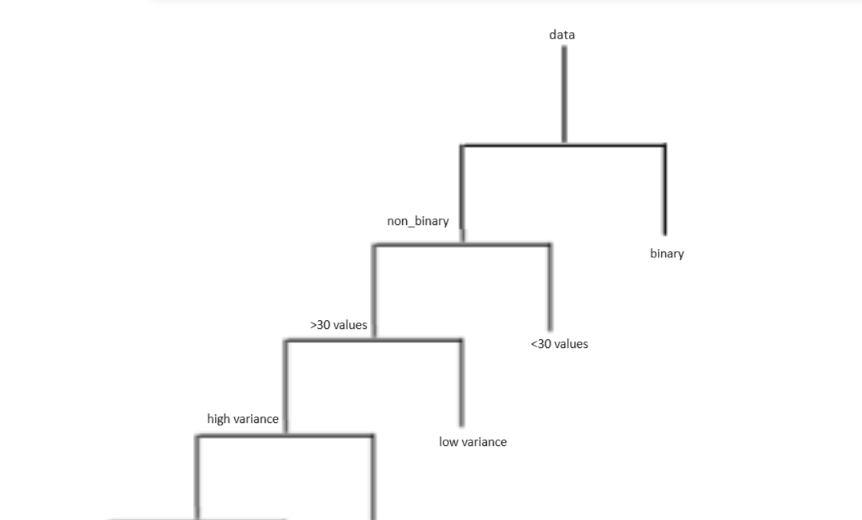

In [2]:
import seaborn as sns

def valuecounts_plot(col,train):
    """
    plots a frequency of occurence vs value line plot for a specific column for both train and test data
    Also prints the top 5 values with highest percenetage occurence
    """
    plt.subplots(1,1,figsize=(15,6))
    #plotting frequency counts for train
    plt.subplot(121)
    df = train[col].value_counts().sort_index()
    sns.lineplot(x=df.index,y=df.values)
    plt.title("Frequency plot of '%s'"%(col))
    plt.ylabel('Frequency')



    plt.tight_layout()
    plt.show()
    print("*"*100)
    print("Percentage value counts(top 5 only) in train data for '%s':"%(col))
    print("Value\t Count%")
    print((train[col].value_counts()*100/train.shape[0]).iloc[:5])
    print("*"*100)
    print("Percentage value counts(bottom 5 only) in train data for '%s':"%(col))
    print("Value\t Count%")
    print((train[col].value_counts()*100/train.shape[0]).iloc[-5:])

In [3]:
def countplot_target(df,y_train,h=500,size=(5,5)):
    """
    It shows the frequency distribution of target variable 
    for a particular df for specific feature
    with percentage annoatations above. 
    It also prints the number of satisfactory and unsatisfactory customers.
    h : represents the additional height of the text above the bar
    size : figure size
    """
    plt.figure(figsize=size)
    ax = sns.countplot(x=y_train,data=df)
    total = df.shape[0]
    #https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + h,
                '{:1.2f}%'.format(height*100/total),
                ha="center") 
    plt.title("Distribution of TARGET feature")
    target_1 = y_train[y_train==1].shape[0]
    target_0 = y_train[y_train==0].shape[0]
    print("The no. of customers that are unsatisfied are %i."%(target_1))
    print("The no. of customers that are satisfied are %i."%(target_0))
    print('')
    plt.show()

In [102]:
df_root=pd.read_csv('/kaggle/input/machine-learning-test-from-m-company-2023/train.csv')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [156]:
df=df_root.copy()

In [157]:
df['etl_date'].sort_values()

47764     2023-11-19
221206    2023-11-19
477206    2023-11-19
221201    2023-11-19
221195    2023-11-19
             ...    
446876    2023-11-26
446877    2023-11-26
166637    2023-11-26
166631    2023-11-26
387290    2023-11-26
Name: etl_date, Length: 491737, dtype: object

In [158]:
def remove_high_null_columns(df):
    null_percentage = df.isnull().sum() / df.shape[0] * 100
    col_to_drop = null_percentage[null_percentage > 50].keys()
    df_remove = df.drop(col_to_drop, axis=1)
    print(f'Removed {df.shape[1]- df_remove.shape[1]} features, {df_remove.shape[1]} features left.')
    return df_remove

In [159]:
df.shape

(491737, 638)

In [160]:
df=remove_high_null_columns(df)

Removed 98 features, 540 features left.


## Characteric value

In [161]:
object_columns = df.select_dtypes(include='object').columns
for col in object_columns:
    df[col] = pd.to_numeric(df[col].astype(str).str.extract('(\d+)', expand=False), errors='coerce',downcast='integer')

In [162]:
object_columns

Index(['etl_date', 'feat_168', 'feat_169', 'feat_170', 'feat_171', 'feat_172',
       'feat_173', 'feat_174', 'feat_175', 'feat_176', 'feat_177', 'feat_179'],
      dtype='object')

In [167]:
df_obj=df[object_columns]

In [168]:
df_obj.head()

,etl_date,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_179
0,2023,0,5,0,1,0,6,0,0,0,0.0,0
1,2023,0,5,0,1,0,6,0,1,0,1.0,0
2,2023,0,5,0,1,0,6,0,2,0,0.0,1
3,2023,1,1,2,13,0,6,1,0,0,0.0,0
4,2023,0,7,3,2,1,4,0,11,0,0.0,0


In [169]:
del df_obj['etl_date']

In [170]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491737 entries, 0 to 491736
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   feat_168  491737 non-null  int8   
 1   feat_169  491737 non-null  int8   
 2   feat_170  491737 non-null  int8   
 3   feat_171  491737 non-null  int8   
 4   feat_172  491737 non-null  int8   
 5   feat_173  491737 non-null  int8   
 6   feat_174  491737 non-null  int8   
 7   feat_175  491737 non-null  int8   
 8   feat_176  491737 non-null  int8   
 9   feat_177  490658 non-null  float64
 10  feat_179  491737 non-null  int8   
dtypes: float64(1), int8(10)
memory usage: 8.4 MB


#### Binary value

In [171]:
non_binary_columns = [col for col in df_obj.columns if df_obj[col].nunique() > 2]
len(non_binary_columns)

7

In [172]:
def nor(df, column):
    set_1 = set(df.columns)
    set_2 = set(column)
    unique_columns = set_1 - set_2
    new_columns = list(unique_columns)
    
    return new_columns

In [173]:
colum_bin=nor(df_obj, non_binary_columns)

In [174]:
df_obj[colum_bin]

,feat_177,feat_168,feat_179,feat_174
0,0.0,0,0,0
1,1.0,0,0,0
2,0.0,0,1,0
3,0.0,1,0,1
4,0.0,0,0,0
...,...,...,...,...
491732,1.0,0,1,0
491733,1.0,0,0,0
491734,1.0,0,1,0
491735,1.0,0,0,0


feat_177
0.0    261890
1.0    228768
Name: count, dtype: int64


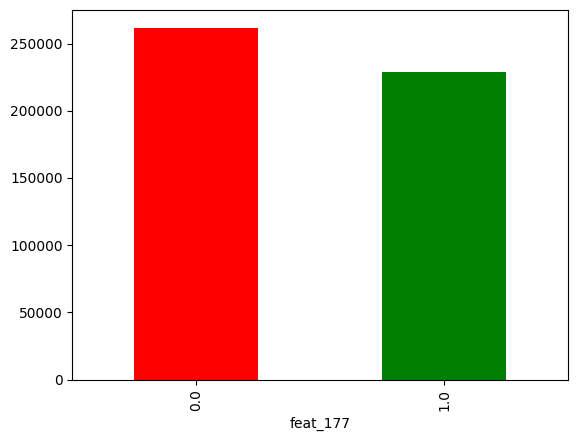

***************************
feat_168
0    266740
1    224997
Name: count, dtype: int64


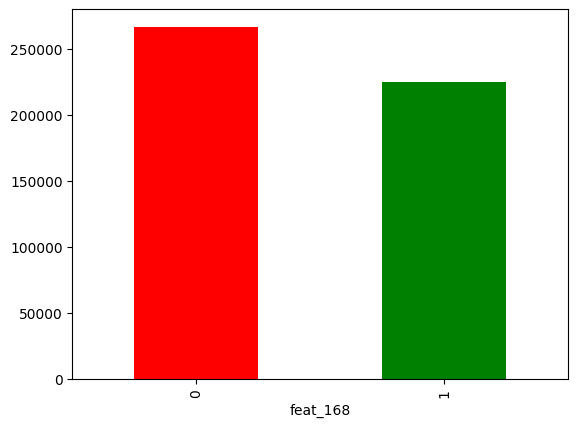

***************************
feat_179
0    287408
1    204329
Name: count, dtype: int64


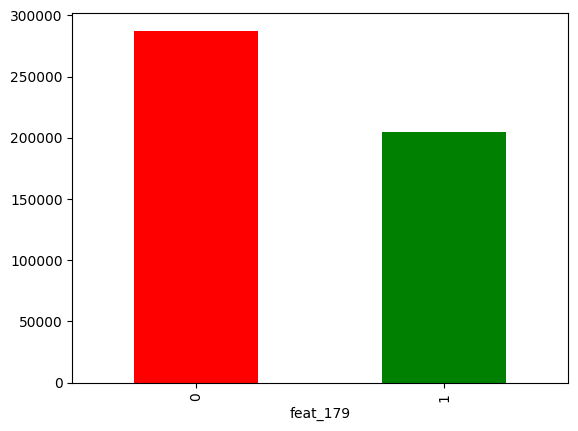

***************************
feat_174
0    329303
1    162434
Name: count, dtype: int64


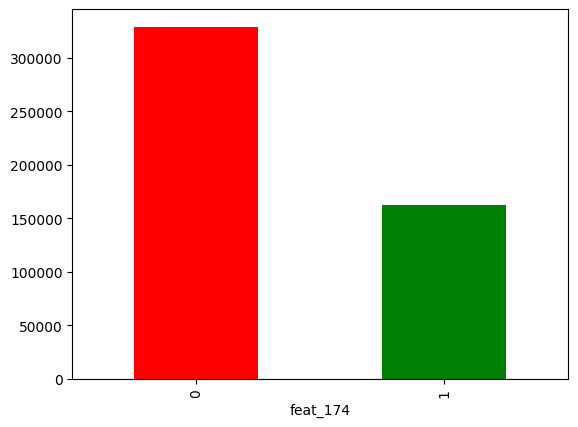

***************************


In [175]:
for i in df_obj[colum_bin].columns:
    print(df_obj[i].value_counts())
    df_obj[i].value_counts().plot.bar(color=['red', 'green'])
    plt.show()  # Thêm dòng này để hiển thị biểu đồ
    print('***************************')


The distribution of the two values is quite uniform, which can be useful for the model

#### Non_Binary Value

In [176]:
df_obj[non_binary_columns]

,feat_169,feat_170,feat_171,feat_172,feat_173,feat_175,feat_176
0,5,0,1,0,6,0,0
1,5,0,1,0,6,1,0
2,5,0,1,0,6,2,0
3,1,2,13,0,6,0,0
4,7,3,2,1,4,11,0
...,...,...,...,...,...,...,...
491732,0,0,1,0,3,0,0
491733,1,0,1,0,2,0,0
491734,0,0,1,0,6,0,0
491735,0,3,2,1,6,4,0


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


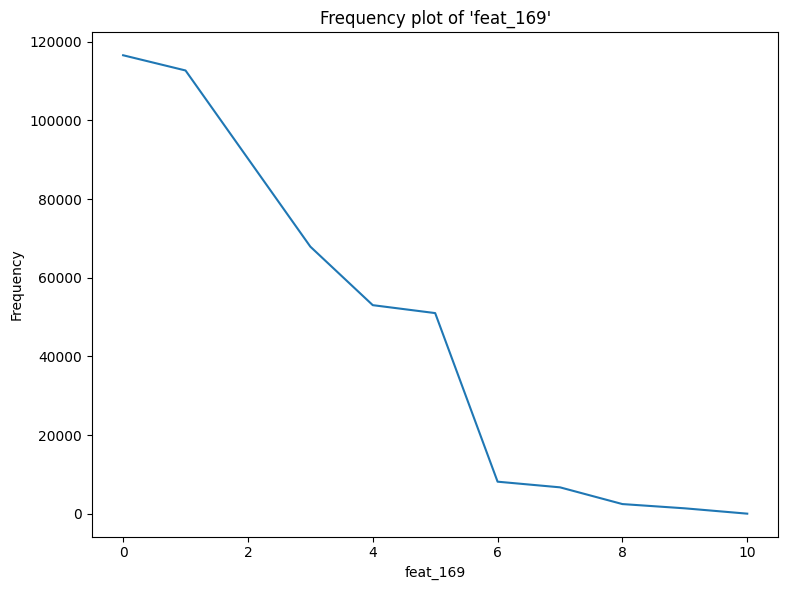

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_169':
Value	 Count%
feat_169
0    27.765433
1    26.843761
3    16.173084
4    12.629290
5    12.148925
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_169':
Value	 Count%
feat_169
6     1.937655
7     1.595183
8     0.581820
9     0.323895
10    0.000953
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


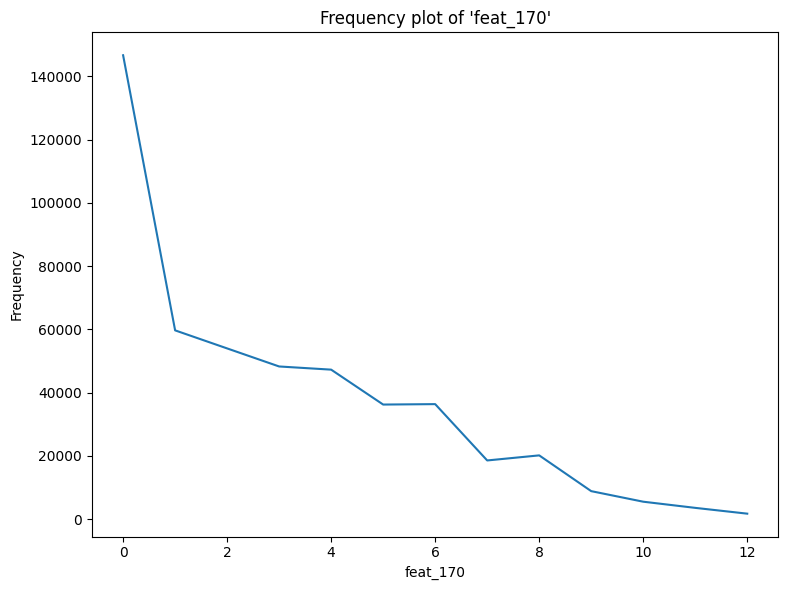

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_170':
Value	 Count%
feat_170
0    33.872692
1    13.786432
3    11.150131
4    10.918549
6     8.400926
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_170':
Value	 Count%
feat_170
7     4.288317
9     2.047531
10    1.276821
11    0.826586
12    0.403595
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


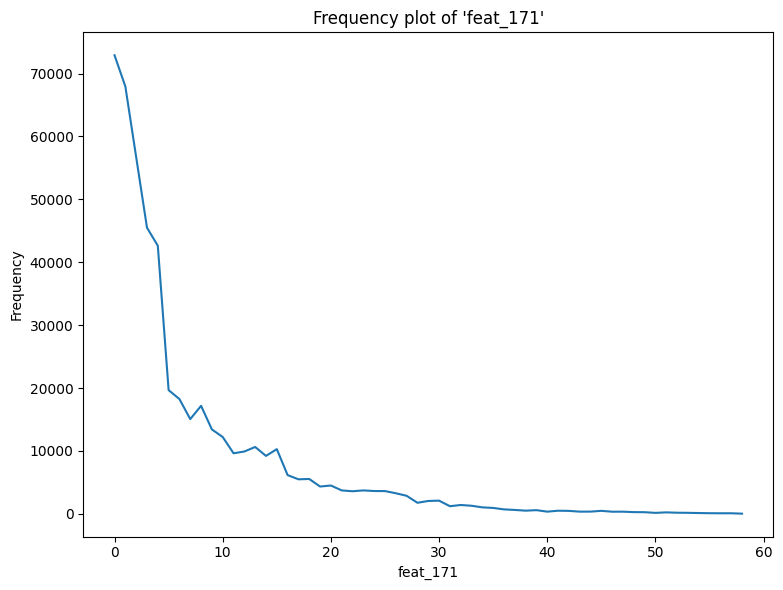

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_171':
Value	 Count%
feat_171
0    16.444204
1    15.326365
3    10.260348
4     9.613143
5     4.434597
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_171':
Value	 Count%
feat_171
54    0.026384
55    0.019845
57    0.018041
56    0.017590
58    0.003834
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


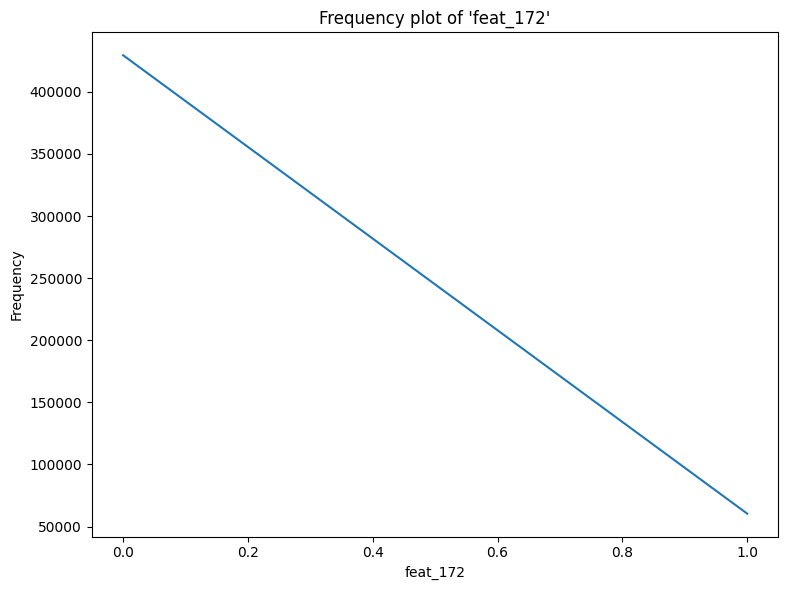

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_172':
Value	 Count%
feat_172
0    87.676395
1    12.323605
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_172':
Value	 Count%
feat_172
0    87.676395
1    12.323605
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


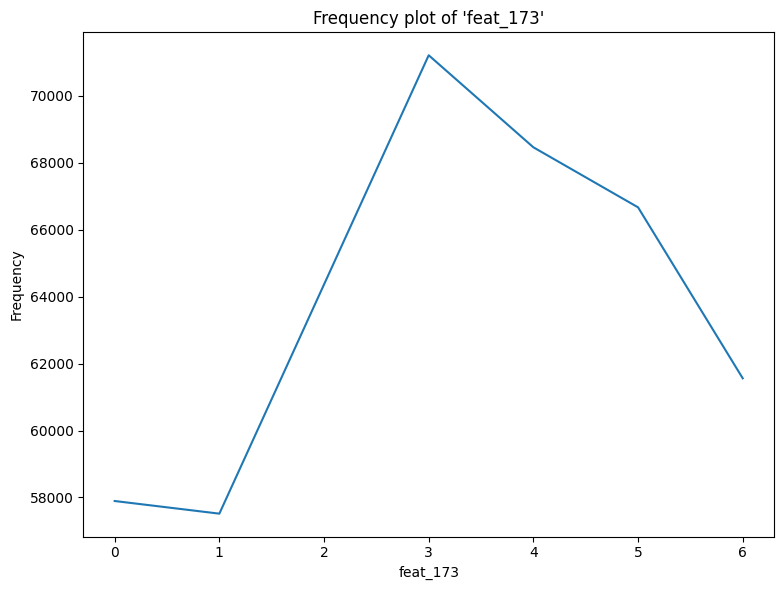

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_173':
Value	 Count%
feat_173
3    18.578047
4    17.860627
5    17.392609
6    16.060034
0    15.103648
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_173':
Value	 Count%
feat_173
4    17.860627
5    17.392609
6    16.060034
0    15.103648
1    15.005035
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


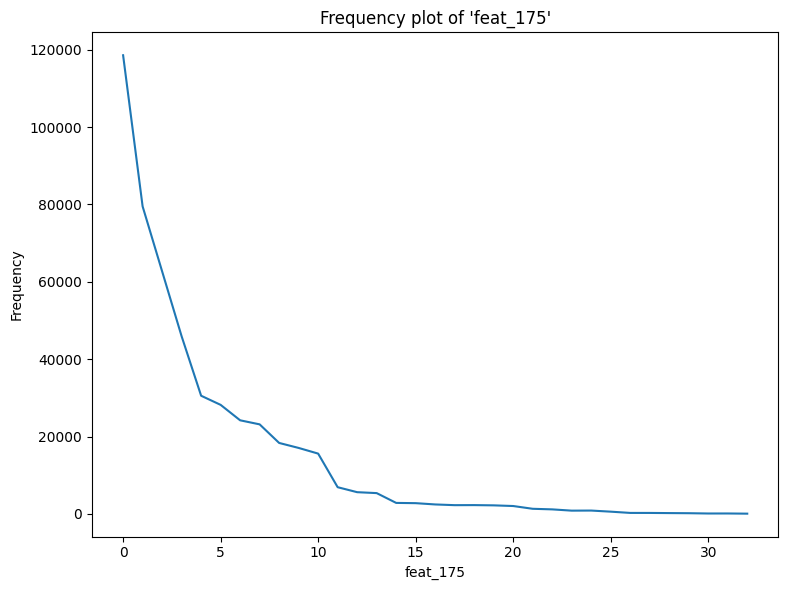

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_175':
Value	 Count%
feat_175
0    26.849867
1    18.001798
3    10.396973
4     6.916523
5     6.382410
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_175':
Value	 Count%
feat_175
28    0.046641
29    0.039623
31    0.024000
30    0.022641
32    0.013132
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


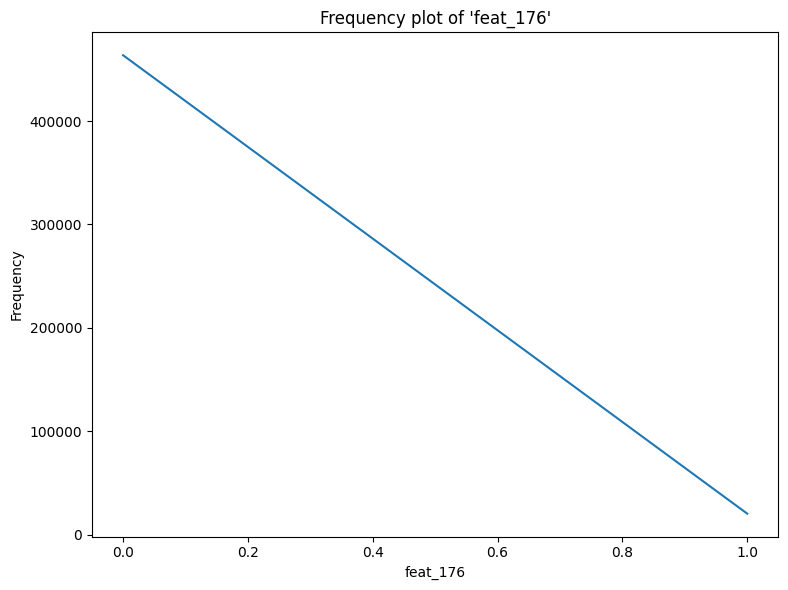

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_176':
Value	 Count%
feat_176
0    95.755387
1     4.244613
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_176':
Value	 Count%
feat_176
0    95.755387
1     4.244613
Name: count, dtype: float64


In [177]:
for i in non_binary_columns:
    valuecounts_plot(i,df_obj[df_obj[i]!=2])

In general, the distribution of most columns is very uniform, except for the appearance of outliers, there are no problems.
- **feat_176**, **feat_172** have a distribution quite skewed towards 0, which may mean something but may not help the model
- Although the remaining columns are distributed quite evenly, because there are many outliers, we can also consider binning those parts to improve the model.

In [178]:
df['feat_176'].value_counts()

feat_176
0    463548
1     20548
2      7641
Name: count, dtype: int64

In [179]:
df=df.drop(object_columns,axis=1)

In [181]:
del df['index']

In [182]:
y_train=df['label']

In [183]:
del df['label']

In [17]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [19]:
i=0
for col in df.columns: 
    if df[col].var()==0:
        i+=1
        del df[col]

In [20]:
df.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_614,feat_615,feat_616,feat_622,feat_623,feat_624,feat_625,feat_626,feat_627,feat_634
0,2465750.0,13,500000000,98126.0,243294.0,243294.0,552.0,1498.0,1498.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
1,2465750.0,13,500000000,98126.0,243294.0,243294.0,552.0,1498.0,1498.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0
2,2465750.0,13,500000000,98126.0,243294.0,243294.0,552.0,1498.0,1498.0,0.0,...,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,26.0
3,0.0,15,50000000,74517.0,558911.0,558911.0,695.0,5730.0,5730.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0
4,3412374.0,11,30000000,15562.0,50687.0,50687.0,848.0,2980.0,2980.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


In [21]:
import itertools

combinations = list(itertools.combinations(df.columns,2)) #getting all the combinations of columns
remove=[]
for f1,f2 in combinations: #finding all columns which have same datavalues, they don't share same feature name
    if (f1 not in remove) & (f2 not in remove):
        if df[f1].equals(df[f2]):
            remove.append(f1)
df.drop(remove,axis=1,inplace=True)

In [22]:
import numpy as np
i=0
for col in df.columns: #reomving all sparse features
    if np.percentile(df[col],99)==0:
        i+=1
        del df[col]

In [23]:
df.shape

(491737, 398)

In [24]:
%%time
combinations = list(itertools.combinations(df.columns,2)) #getting all the combinations of columns
remove=[]


CPU times: user 11.5 ms, sys: 2.03 ms, total: 13.5 ms
Wall time: 13.5 ms


In [25]:
for f1,f2 in combinations: #finding all columns which have same datavalues, they don't share same feature name
    if (f1 not in remove) & (f2 not in remove):
        if df[f1].equals(df[f2]):
            remove.append(f1)
df.drop(remove,axis=1,inplace=True)
print("%i were found to be duplicated columns and %i of these were removed."%(len(remove)*2,len(remove)))
del remove
del combinations

0 were found to be duplicated columns and 0 of these were removed.


In [26]:
df.shape

(491737, 398)

# EDA

- Filter binary columns
- Filter <10 values in 1 column
- Filter by variance

## Filter Binary Column

In [27]:
df.apply(lambda x: (x == 0).sum() / len(x) * 100).sort_values().tail(100)

feat_481    80.550782
feat_544    80.551392
feat_340    81.190758
feat_532    81.643236
feat_295    81.903741
              ...    
feat_627    95.871370
feat_353    96.098321
feat_412    96.209966
feat_415    96.709217
feat_356    96.720605
Length: 100, dtype: float64

In [28]:
df.shape

(491737, 398)

In [29]:
non_binary_columns = [col for col in df.columns if df[col].nunique() != 2]
len(non_binary_columns)

398

In [31]:
colum1=nor(df, non_binary_columns)

In [32]:
df1=df[colum1]

# Binary Cols

In [33]:
df1

""
0
1
2
3
4
...
491732
491733
491734
491735


In [34]:
df_non_bin=df.copy()

In [35]:
df_non_bin=df_non_bin[non_binary_columns]

In [36]:
df_non_bin.shape

(491737, 398)

In [37]:
df_non_bin.apply(lambda x: (x == 0).sum() / len(x) * 100).sort_values()

feat_634     0.000000
feat_221     0.000000
feat_226     0.000000
feat_227     0.000000
feat_233     0.000000
              ...    
feat_627    95.871370
feat_353    96.098321
feat_412    96.209966
feat_415    96.709217
feat_356    96.720605
Length: 398, dtype: float64

In [38]:
zero_percentage = df_non_bin.apply(lambda x: (x == 0).sum() / len(x) * 100)
columns_over_30_percent_zeros = zero_percentage[zero_percentage > 30].index

In [39]:
columns_over_30_percent_zeros

Index(['feat_0', 'feat_9', 'feat_10', 'feat_11', 'feat_39', 'feat_40',
       'feat_41', 'feat_48', 'feat_49', 'feat_50',
       ...
       'feat_613', 'feat_614', 'feat_615', 'feat_616', 'feat_622', 'feat_623',
       'feat_624', 'feat_625', 'feat_626', 'feat_627'],
      dtype='object', length=253)

# Columns with less than 30% of values are 0

In [40]:
column2=nor(df_non_bin,columns_over_30_percent_zeros)
df_less_30=df_non_bin[column2]

In [41]:
df_less_30.shape

(491737, 145)

In [42]:
df_30_percent_zeros=df_non_bin[columns_over_30_percent_zeros]

In [43]:
df_30_percent_zeros.shape

(491737, 253)

# Columns with more than 30% of values are 0

In [44]:
df_30_percent_zeros

,feat_0,feat_9,feat_10,feat_11,feat_39,feat_40,feat_41,feat_48,feat_49,feat_50,...,feat_613,feat_614,feat_615,feat_616,feat_622,feat_623,feat_624,feat_625,feat_626,feat_627
0,2465750.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2465750.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2465750.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3412374.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491732,499762.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
491733,2465750.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0
491734,704363.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0
491735,3412374.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0


## Filter <30 values on 1 column

In [45]:
columns_with_less_than_10_values = [col for col in df_30_percent_zeros.columns if df_30_percent_zeros[col].nunique() < 30]
len(columns_with_less_than_10_values)

83

In [46]:
columns_with_less_than_10_values

['feat_9',
 'feat_10',
 'feat_11',
 'feat_39',
 'feat_40',
 'feat_41',
 'feat_48',
 'feat_49',
 'feat_50',
 'feat_57',
 'feat_58',
 'feat_59',
 'feat_69',
 'feat_70',
 'feat_71',
 'feat_90',
 'feat_270',
 'feat_282',
 'feat_294',
 'feat_306',
 'feat_307',
 'feat_318',
 'feat_319',
 'feat_320',
 'feat_330',
 'feat_331',
 'feat_339',
 'feat_342',
 'feat_343',
 'feat_351',
 'feat_352',
 'feat_353',
 'feat_356',
 'feat_366',
 'feat_375',
 'feat_376',
 'feat_378',
 'feat_379',
 'feat_387',
 'feat_390',
 'feat_391',
 'feat_410',
 'feat_411',
 'feat_412',
 'feat_413',
 'feat_414',
 'feat_415',
 'feat_425',
 'feat_426',
 'feat_446',
 'feat_458',
 'feat_459',
 'feat_460',
 'feat_470',
 'feat_471',
 'feat_482',
 'feat_494',
 'feat_495',
 'feat_506',
 'feat_518',
 'feat_519',
 'feat_530',
 'feat_533',
 'feat_534',
 'feat_542',
 'feat_554',
 'feat_559',
 'feat_566',
 'feat_567',
 'feat_578',
 'feat_579',
 'feat_590',
 'feat_591',
 'feat_592',
 'feat_602',
 'feat_603',
 'feat_614',
 'feat_615',
 'f

In [47]:
df['feat_626'].value_counts()

feat_626
0.0     428525
1.0       1562
2.0        231
3.0         44
4.0          9
5.0          3
11.0         2
6.0          1
Name: count, dtype: int64

In [48]:
colum_3=nor(df_30_percent_zeros,columns_with_less_than_10_values)

In [49]:
df_30_percent_zeros

,feat_0,feat_9,feat_10,feat_11,feat_39,feat_40,feat_41,feat_48,feat_49,feat_50,...,feat_613,feat_614,feat_615,feat_616,feat_622,feat_623,feat_624,feat_625,feat_626,feat_627
0,2465750.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2465750.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2465750.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3412374.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491732,499762.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
491733,2465750.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0
491734,704363.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0
491735,3412374.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0


# Columns with less than 30 values

In [50]:
df2=df_30_percent_zeros[columns_with_less_than_10_values]

# Columns with more than 30 values

In [51]:
df3=df_30_percent_zeros[colum_3]

In [52]:
df2.shape

(491737, 83)

In [53]:
df3.shape

(491737, 170)

# VALUES HAVE LARGE VARIANCE

In [54]:
variances = df3.var()

# Tính Q1 của phân phối phương sai
Q1 = variances.quantile(0.25)

# Lọc ra các cột có phương sai lớn hơn Q1
high_variance_columns = variances[variances > Q1].index

print("Các cột có phương sai lớn hơn Q1:")
print(high_variance_columns)

Các cột có phương sai lớn hơn Q1:
Index(['feat_149', 'feat_623', 'feat_535', 'feat_87', 'feat_135', 'feat_102',
       'feat_527', 'feat_91', 'feat_158', 'feat_604',
       ...
       'feat_508', 'feat_456', 'feat_491', 'feat_120', 'feat_284', 'feat_496',
       'feat_76', 'feat_0', 'feat_443', 'feat_383'],
      dtype='object', length=127)


In [55]:
len(high_variance_columns)

127

# Columns with large variance

In [56]:
df4=df3[high_variance_columns]

In [57]:
colum_5=nor(df3,high_variance_columns)
len(colum_5)

43

# Columns with low variance

In [58]:
df5=df3[colum_5]

In [57]:
test=pd.read_csv('test.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'

# LOW VARIANCE

In [59]:
df5.head()

,feat_580,feat_550,feat_408,feat_278,feat_314,feat_432,feat_373,feat_392,feat_478,feat_256,...,feat_514,feat_338,feat_257,feat_433,feat_610,feat_526,feat_574,feat_455,feat_472,feat_313
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,NaN,NaN,0.0,0.0,0.0
1,0.0,0.0,0.033333,0.000000,0.0,NaN,0.028571,0.0,0.0,0.022222,...,0.0,0.0,0.008547,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.002747,...,0.0,0.0,0.007148,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,NaN,0.015152,0.333333,0.0,NaN,0.000000,0.0,0.0,0.012821,...,0.0,NaN,0.004808,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [60]:
df5['feat_409'].value_counts()

feat_409
0.000000    281395
0.016667      1044
0.041667       987
0.027778       981
0.083333       926
             ...  
0.022427         1
0.020756         1
0.011011         1
0.009540         1
0.022243         1
Name: count, Length: 29925, dtype: int64

## EDA for LOW VARIANCE COLUMNS

In [61]:
df5.columns

Index(['feat_580', 'feat_550', 'feat_408', 'feat_278', 'feat_314', 'feat_432',
       'feat_373', 'feat_392', 'feat_478', 'feat_256', 'feat_513', 'feat_302',
       'feat_483', 'feat_344', 'feat_255', 'feat_549', 'feat_277', 'feat_611',
       'feat_308', 'feat_543', 'feat_290', 'feat_401', 'feat_586', 'feat_337',
       'feat_609', 'feat_562', 'feat_409', 'feat_447', 'feat_502', 'feat_374',
       'feat_561', 'feat_598', 'feat_587', 'feat_514', 'feat_338', 'feat_257',
       'feat_433', 'feat_610', 'feat_526', 'feat_574', 'feat_455', 'feat_472',
       'feat_313'],
      dtype='object')

In [62]:
df['feat_433'].value_counts()

feat_433
0.000000    344157
0.166667      2389
0.083333      2116
0.250000      2026
0.333333      1908
             ...  
0.017457         1
0.004577         1
0.046974         1
0.242157         1
0.169168         1
Name: count, Length: 3273, dtype: int64

/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


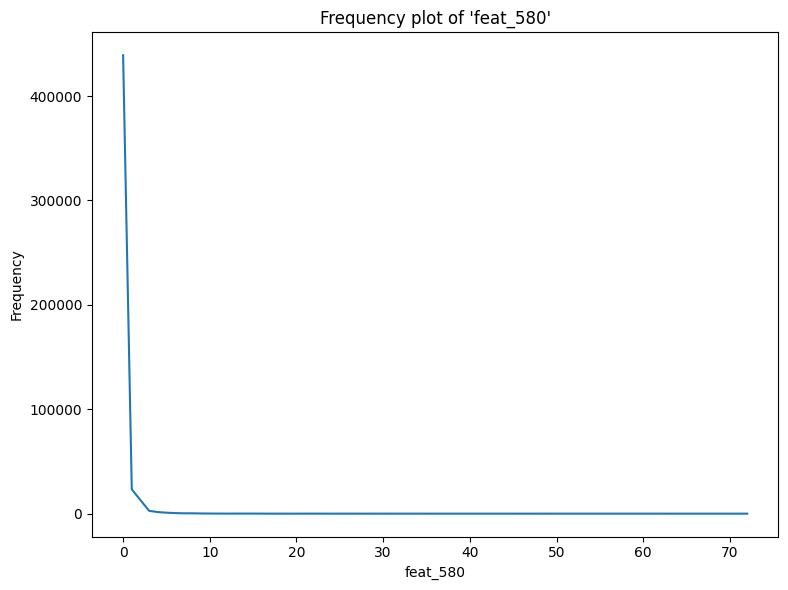

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_580':
Value	 Count%
feat_580
0.0    90.389485
1.0     4.788686
3.0     0.561583
4.0     0.313729
5.0     0.191654
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_580':
Value	 Count%
feat_580
47.0    0.000412
46.0    0.000412
28.0    0.000206
72.0    0.000206
45.0    0.000206
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


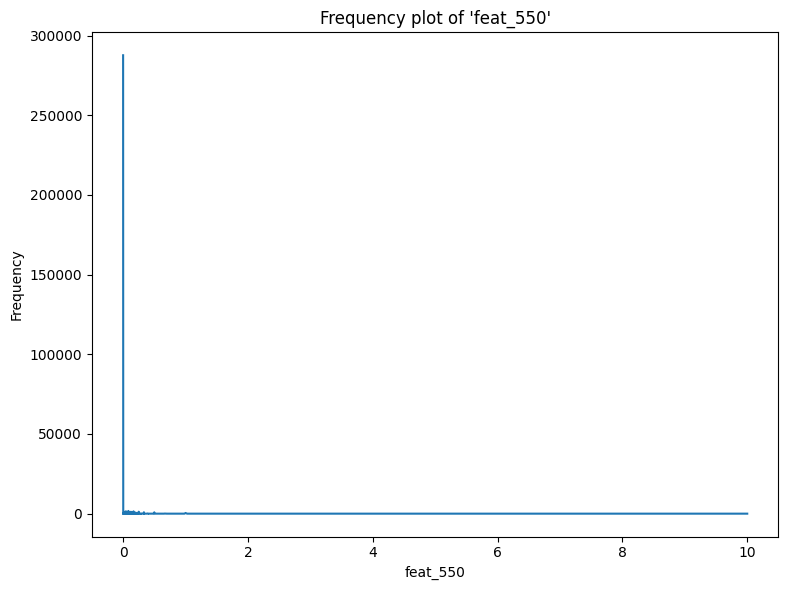

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_550':
Value	 Count%
feat_550
0.000000    58.512289
0.083333     0.345133
0.166667     0.295508
0.041667     0.266629
0.050000     0.248528
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_550':
Value	 Count%
feat_550
0.031926    0.000203
0.012138    0.000203
0.045518    0.000203
0.021062    0.000203
0.064168    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


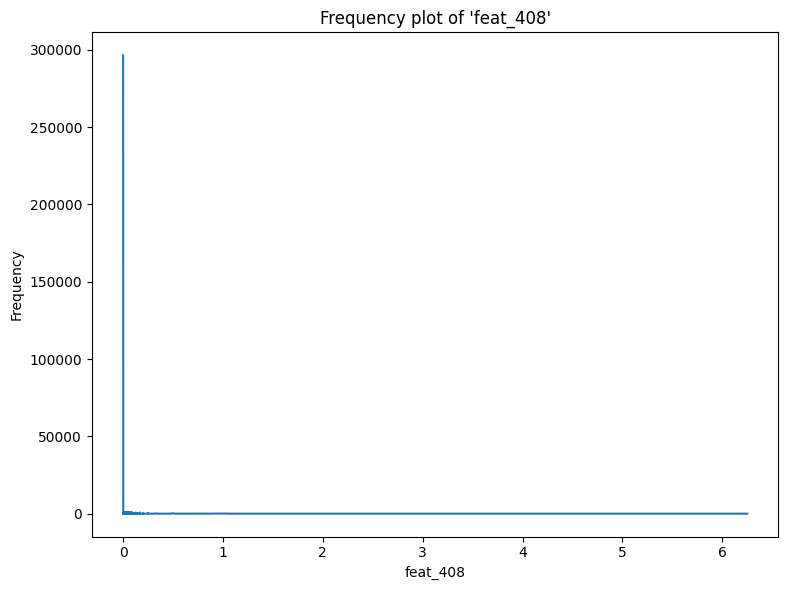

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_408':
Value	 Count%
feat_408
0.000000    60.300162
0.041667     0.250541
0.083333     0.227155
0.033333     0.225121
0.027778     0.197464
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_408':
Value	 Count%
feat_408
0.027361    0.000203
0.010093    0.000203
0.019781    0.000203
0.096681    0.000203
0.081817    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


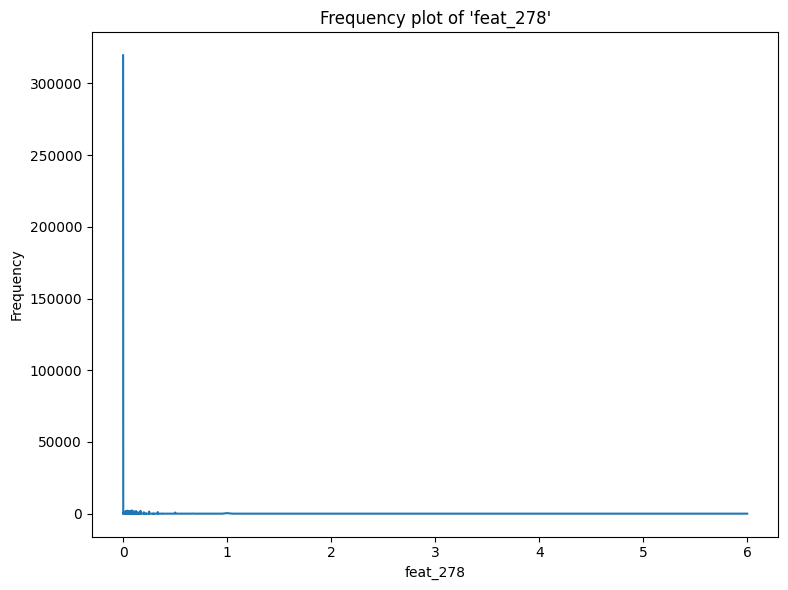

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_278':
Value	 Count%
feat_278
0.000000    65.009965
0.083333     0.464695
0.041667     0.424429
0.166667     0.399008
0.055556     0.378467
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_278':
Value	 Count%
feat_278
0.112471    0.000203
0.025887    0.000203
0.145654    0.000203
0.016231    0.000203
0.112401    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


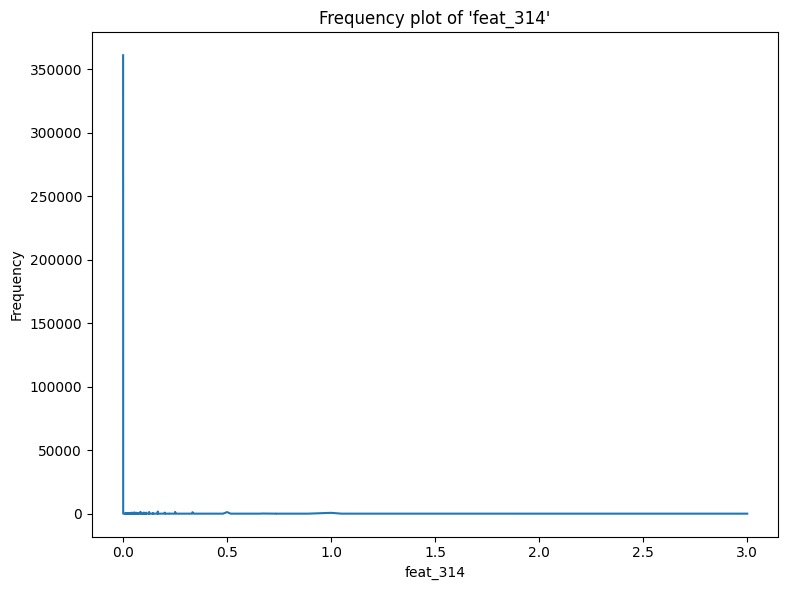

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_314':
Value	 Count%
feat_314
0.000000    73.399402
0.166667     0.337803
0.083333     0.296925
0.250000     0.276181
0.125000     0.266826
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_314':
Value	 Count%
feat_314
0.088068    0.000203
0.083024    0.000203
0.027412    0.000203
0.134615    0.000203
0.089784    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


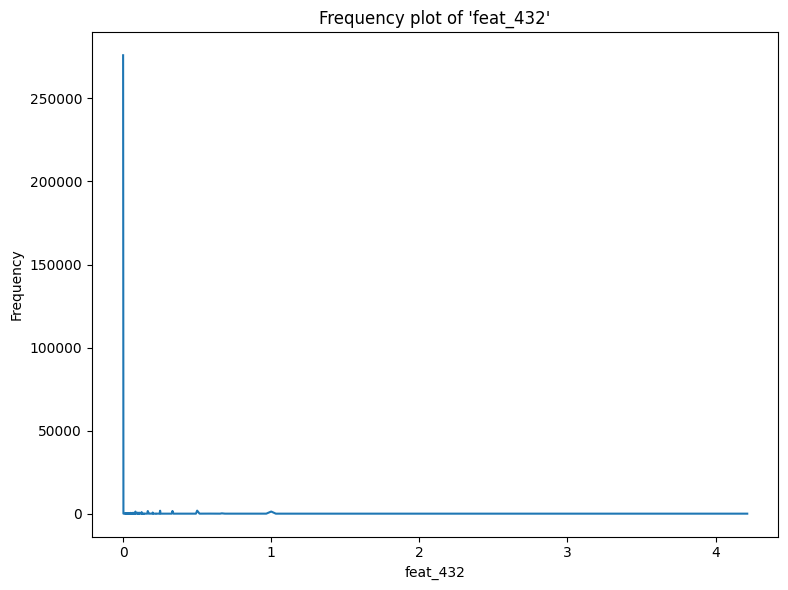

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_432':
Value	 Count%
feat_432
0.000000    56.136611
0.500000     0.371182
0.250000     0.359996
0.333333     0.330912
0.166667     0.323183
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_432':
Value	 Count%
feat_432
0.050794    0.000203
0.005556    0.000203
0.080159    0.000203
0.026316    0.000203
0.384921    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


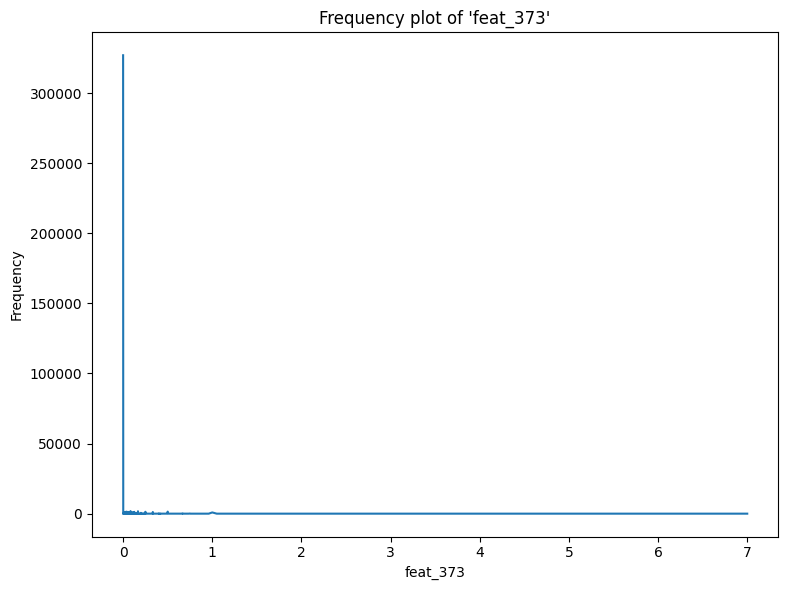

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_373':
Value	 Count%
feat_373
0.000000    66.497036
0.083333     0.374043
0.166667     0.347195
0.500000     0.297160
0.033333     0.279668
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_373':
Value	 Count%
feat_373
0.039072    0.000203
0.042500    0.000203
0.217234    0.000203
0.122685    0.000203
0.148214    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


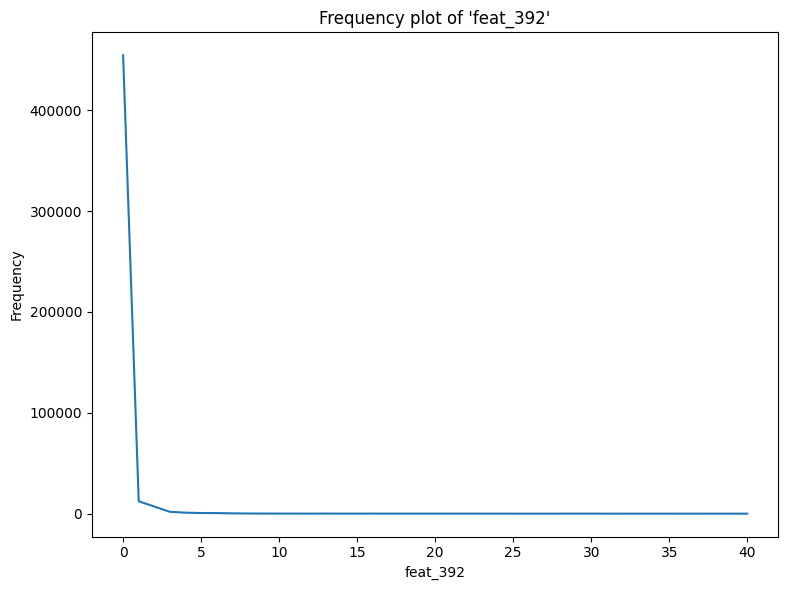

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_392':
Value	 Count%
feat_392
0.0    93.142963
1.0     2.517034
3.0     0.376643
4.0     0.201641
5.0     0.128485
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_392':
Value	 Count%
feat_392
37.0    0.000410
31.0    0.000410
27.0    0.000205
32.0    0.000205
35.0    0.000205
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


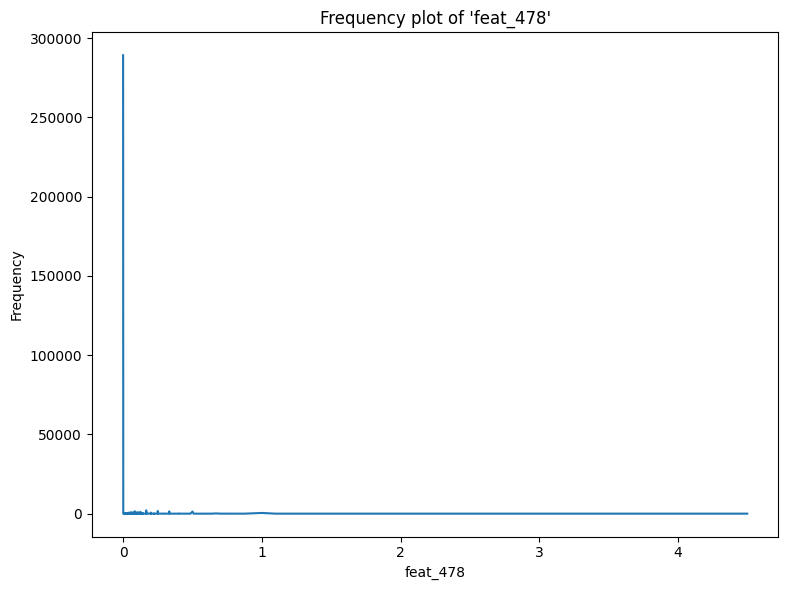

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_478':
Value	 Count%
feat_478
0.000000    58.818565
0.166667     0.427476
0.250000     0.338605
0.083333     0.307490
0.333333     0.291424
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_478':
Value	 Count%
feat_478
0.024510    0.000203
0.005291    0.000203
0.026865    0.000203
0.059063    0.000203
0.156025    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


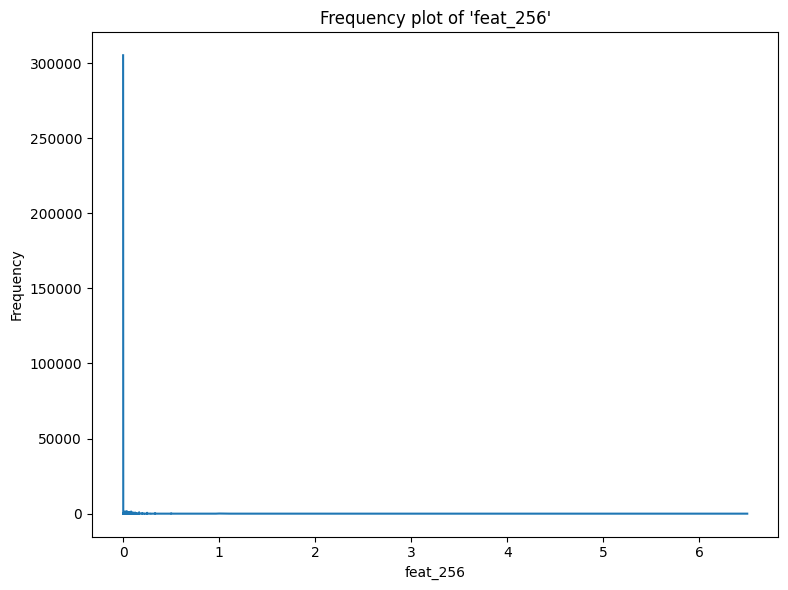

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_256':
Value	 Count%
feat_256
0.000000    62.071210
0.041667     0.304434
0.083333     0.291622
0.033333     0.288165
0.016667     0.280437
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_256':
Value	 Count%
feat_256
0.012338    0.000203
0.021521    0.000203
0.052040    0.000203
0.056513    0.000203
0.115951    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


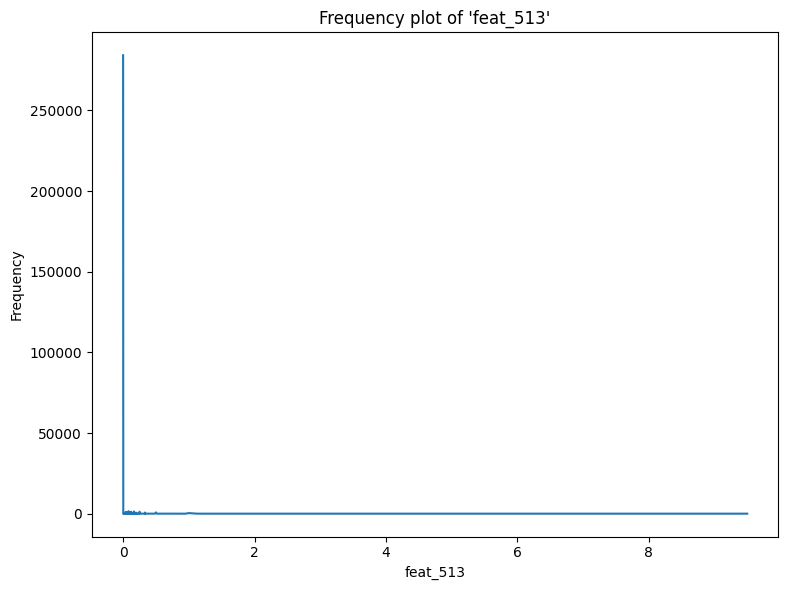

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_513':
Value	 Count%
feat_513
0.000000    57.799195
0.083333     0.308311
0.166667     0.275162
0.250000     0.244859
0.125000     0.235708
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_513':
Value	 Count%
feat_513
0.090556    0.000203
0.023333    0.000203
0.758333    0.000203
0.111244    0.000203
0.080087    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


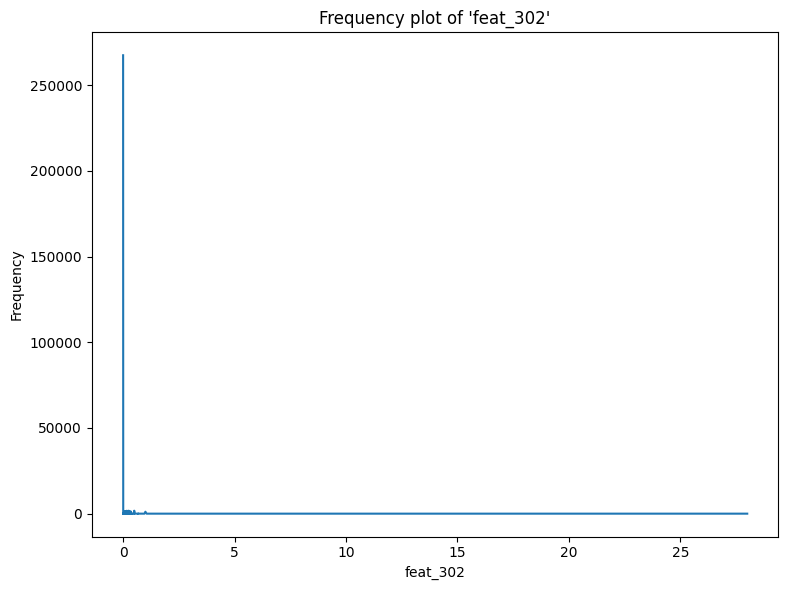

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_302':
Value	 Count%
feat_302
0.000000    54.417612
0.250000     0.351871
0.500000     0.350651
0.166667     0.348210
0.083333     0.306515
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_302':
Value	 Count%
feat_302
0.167857    0.000203
0.028744    0.000203
0.037729    0.000203
0.148928    0.000203
0.105396    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


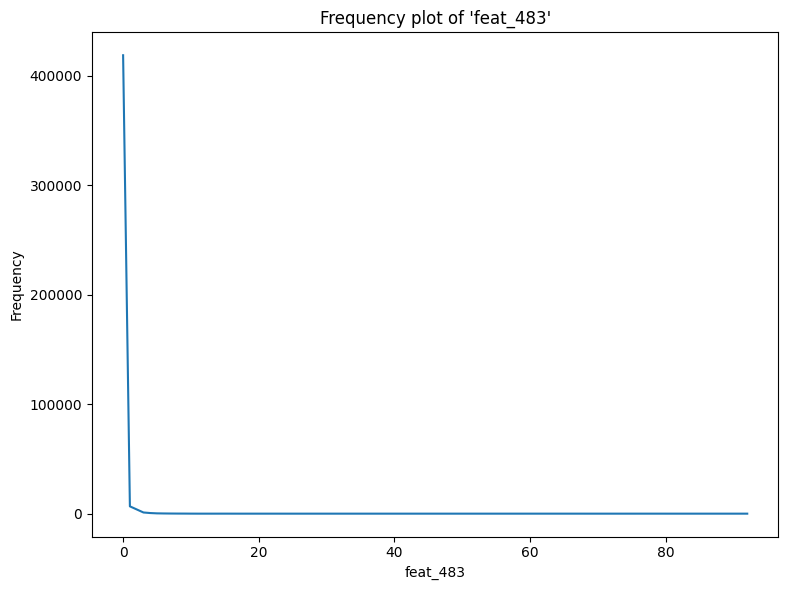

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_483':
Value	 Count%
feat_483
0.0    85.573126
1.0     1.365461
3.0     0.220559
4.0     0.114879
5.0     0.056826
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_483':
Value	 Count%
feat_483
18.0    0.000409
21.0    0.000409
74.0    0.000409
24.0    0.000204
27.0    0.000204
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


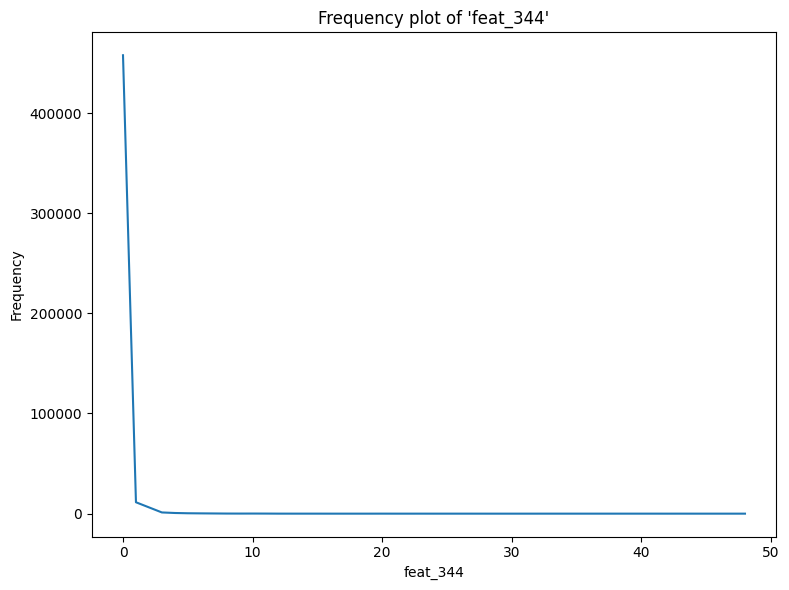

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_344':
Value	 Count%
feat_344
0.0    93.688600
1.0     2.329799
3.0     0.248927
4.0     0.137155
5.0     0.082089
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_344':
Value	 Count%
feat_344
32.0    0.001228
42.0    0.000819
24.0    0.000614
48.0    0.000614
29.0    0.000205
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


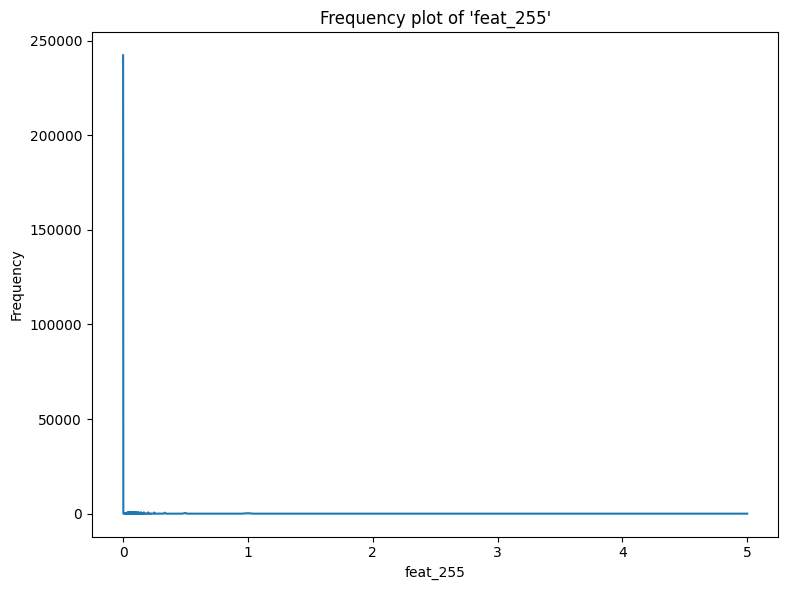

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_255':
Value	 Count%
feat_255
0.000000    49.277240
0.111111     0.174081
0.125000     0.162692
0.100000     0.161879
0.142857     0.159642
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_255':
Value	 Count%
feat_255
0.003012    0.000203
0.004608    0.000203
0.086705    0.000203
0.069231    0.000203
0.116071    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


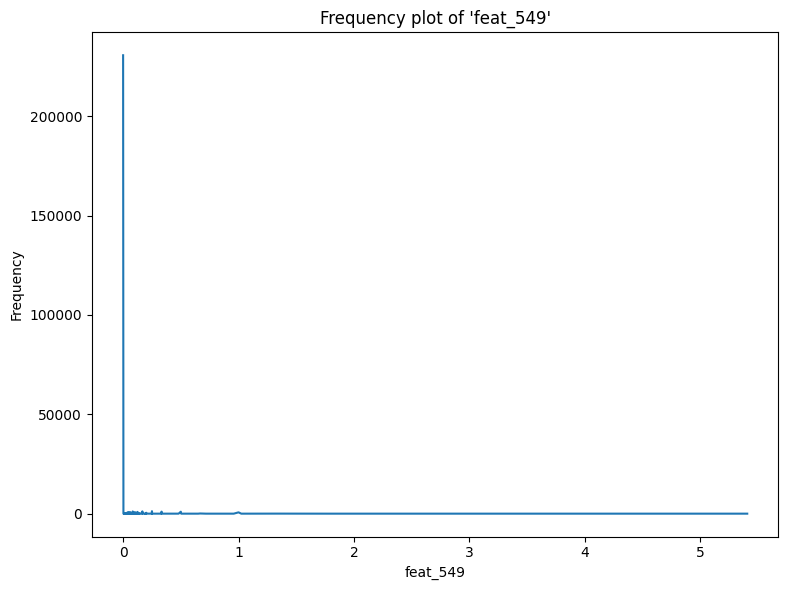

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_549':
Value	 Count%
feat_549
0.000000    46.909028
0.250000     0.252802
0.166667     0.234701
0.083333     0.227176
0.333333     0.208058
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_549':
Value	 Count%
feat_549
0.024823    0.000203
0.049524    0.000203
0.047757    0.000203
0.103818    0.000203
0.154401    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


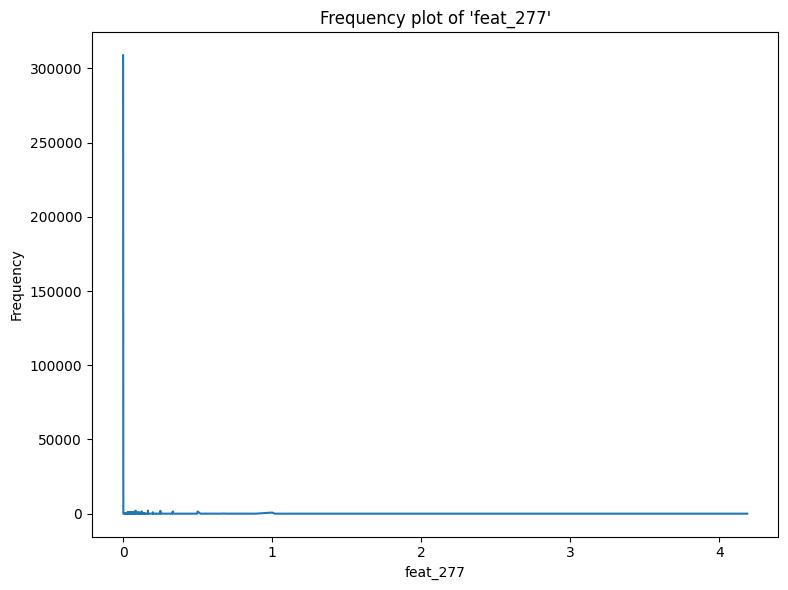

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_277':
Value	 Count%
feat_277
0.000000    62.825219
0.166667     0.417322
0.083333     0.417118
0.250000     0.392714
0.333333     0.310958
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_277':
Value	 Count%
feat_277
0.134921    0.000203
0.098755    0.000203
0.136508    0.000203
0.034012    0.000203
0.496528    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


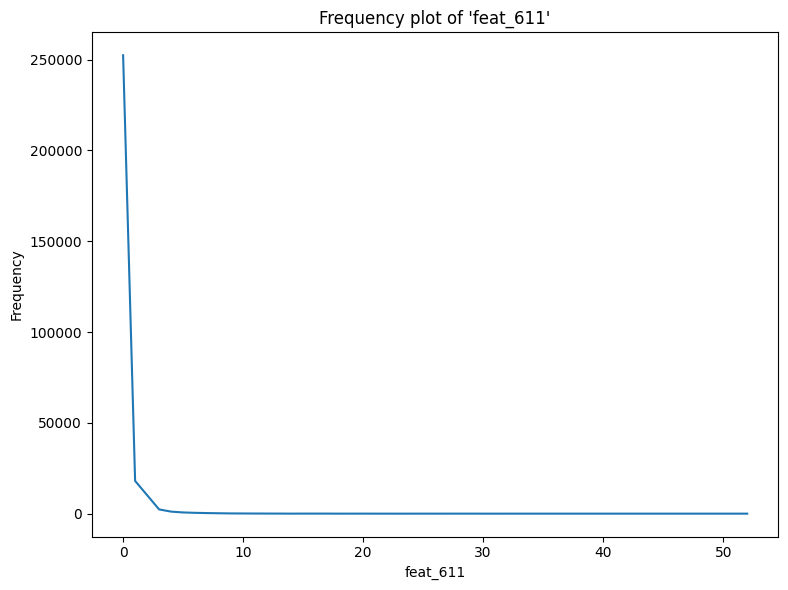

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_611':
Value	 Count%
feat_611
0.0    51.925518
1.0     3.710523
3.0     0.481611
4.0     0.231239
5.0     0.137015
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_611':
Value	 Count%
feat_611
39.0    0.000823
32.0    0.000823
24.0    0.000617
22.0    0.000617
30.0    0.000411
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


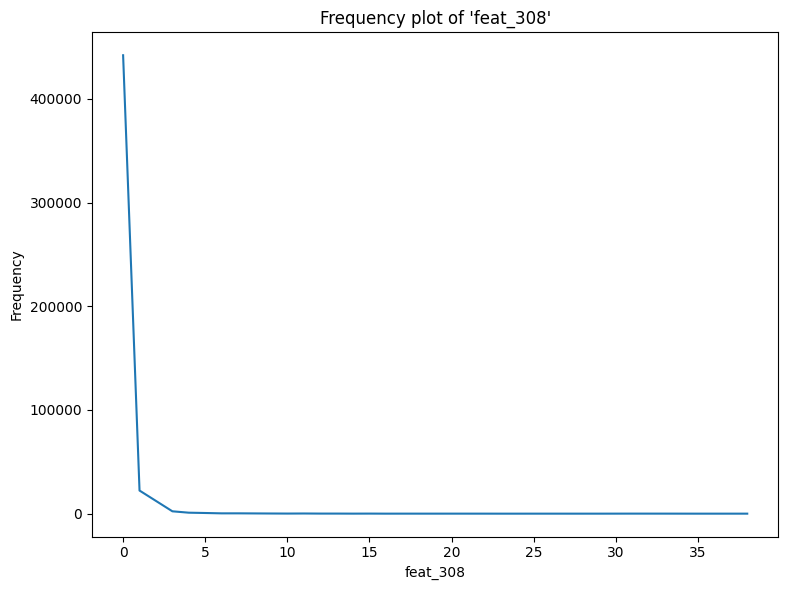

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_308':
Value	 Count%
feat_308
0.0    90.967945
1.0     4.586897
3.0     0.467803
4.0     0.192346
5.0     0.131865
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_308':
Value	 Count%
feat_308
28.0    0.001234
27.0    0.000617
35.0    0.000411
24.0    0.000206
23.0    0.000206
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


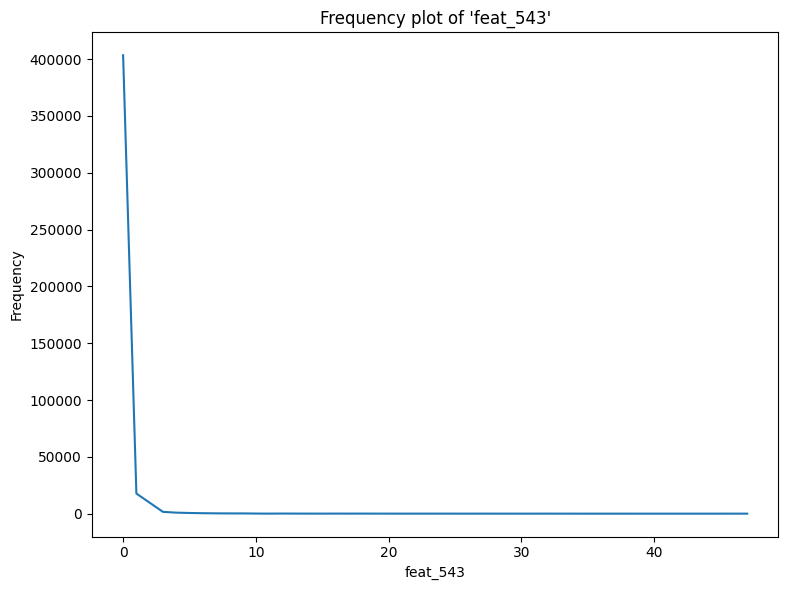

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_543':
Value	 Count%
feat_543
0.0    82.750493
1.0     3.628323
3.0     0.325335
4.0     0.185026
5.0     0.123283
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_543':
Value	 Count%
feat_543
47.0    0.001231
45.0    0.000615
30.0    0.000410
35.0    0.000205
38.0    0.000205
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


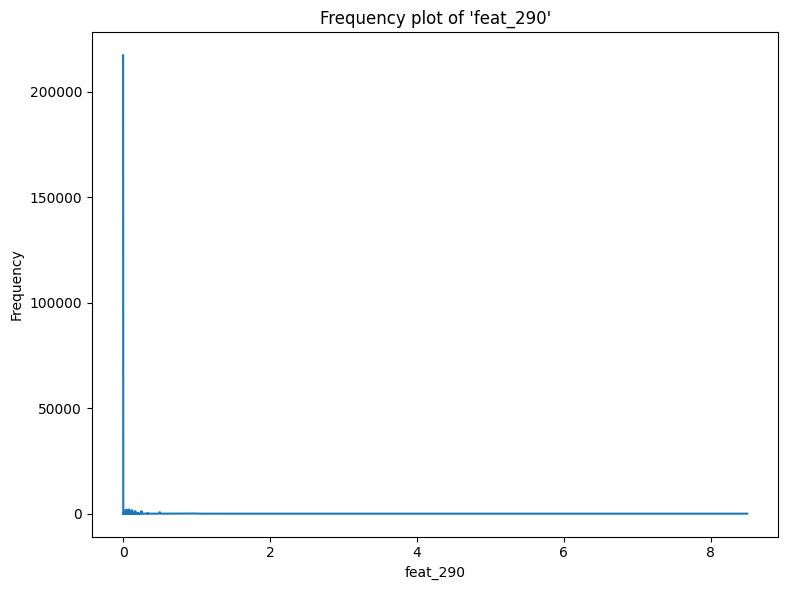

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_290':
Value	 Count%
feat_290
0.000000    44.188028
0.083333     0.409774
0.041667     0.395945
0.125000     0.330666
0.062500     0.314194
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_290':
Value	 Count%
feat_290
0.077065    0.000203
0.035493    0.000203
0.011029    0.000203
0.028485    0.000203
0.079436    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


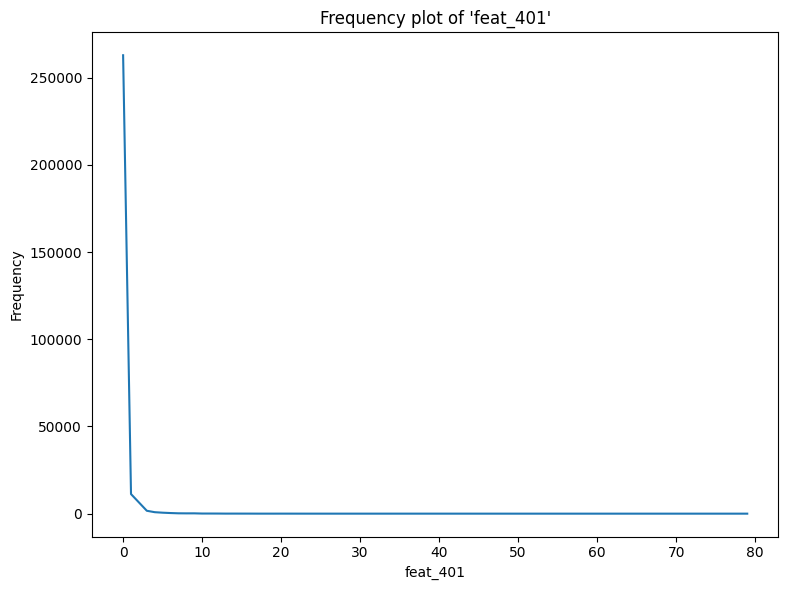

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_401':
Value	 Count%
feat_401
0.0    53.817310
1.0     2.301035
3.0     0.340363
4.0     0.173253
5.0     0.114069
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_401':
Value	 Count%
feat_401
33.0    0.001434
44.0    0.001024
27.0    0.001024
79.0    0.000410
54.0    0.000205
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


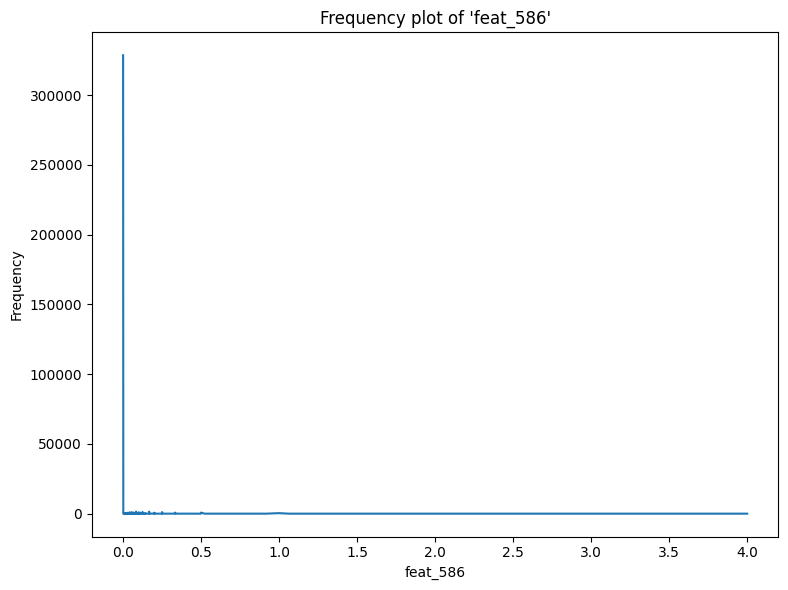

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_586':
Value	 Count%
feat_586
0.000000    66.843196
0.083333     0.310350
0.166667     0.296927
0.125000     0.249338
0.250000     0.231237
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_586':
Value	 Count%
feat_586
0.024090    0.000203
0.050595    0.000203
0.036111    0.000203
0.066378    0.000203
0.058575    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


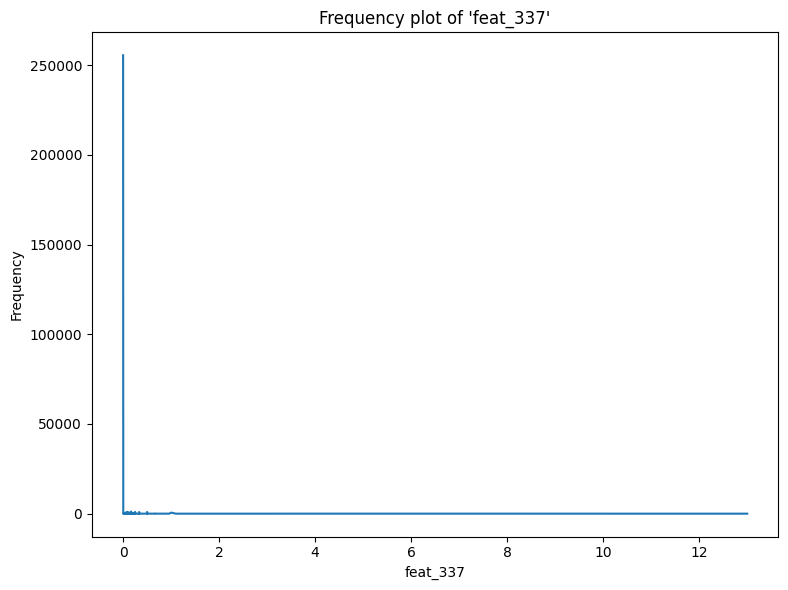

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_337':
Value	 Count%
feat_337
0.000000    51.969143
0.166667     0.243651
0.083333     0.202568
0.250000     0.199518
0.500000     0.193620
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_337':
Value	 Count%
feat_337
0.050526    0.000203
0.433333    0.000203
0.269231    0.000203
0.143741    0.000203
0.296296    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


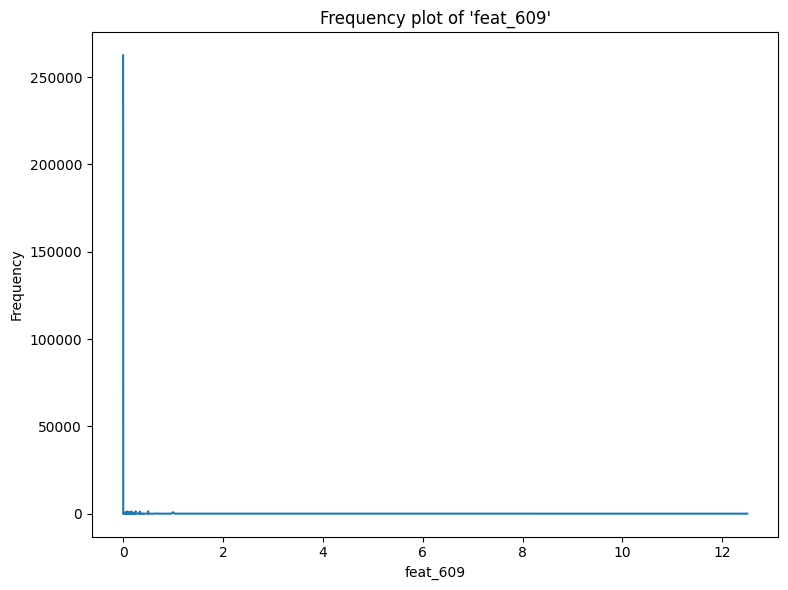

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_609':
Value	 Count%
feat_609
0.000000    53.386280
0.500000     0.279038
0.250000     0.273140
0.166667     0.262971
0.083333     0.247310
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_609':
Value	 Count%
feat_609
0.290000    0.000203
0.083275    0.000203
0.580000    0.000203
0.003906    0.000203
0.075758    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


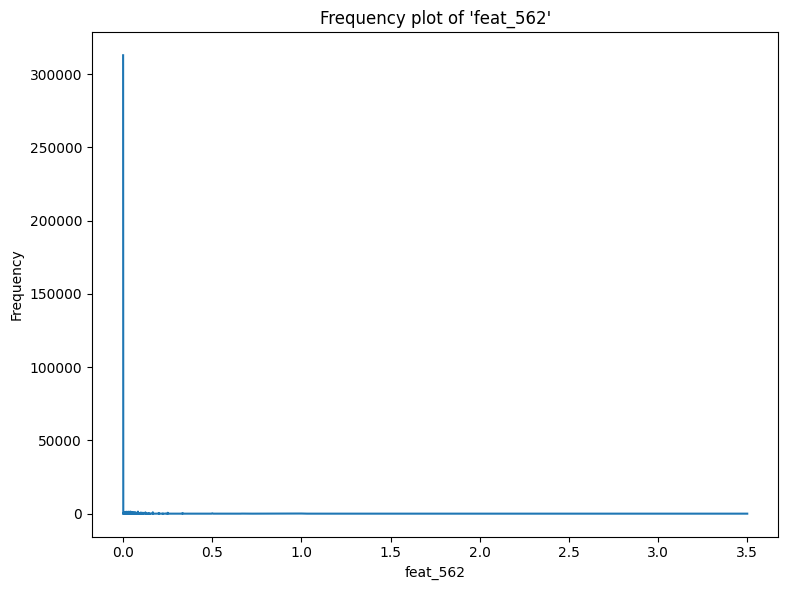

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_562':
Value	 Count%
feat_562
0.000000    63.628636
0.041667     0.287758
0.083333     0.283691
0.027778     0.267422
0.033333     0.265998
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_562':
Value	 Count%
feat_562
0.026438    0.000203
0.030105    0.000203
0.034711    0.000203
0.035632    0.000203
0.010455    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


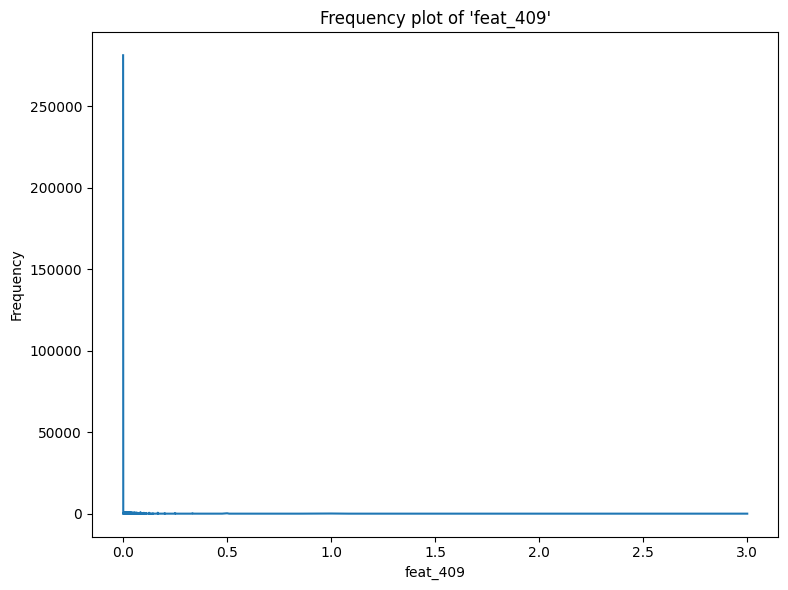

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_409':
Value	 Count%
feat_409
0.000000    57.224812
0.016667     0.212309
0.041667     0.200717
0.027778     0.199497
0.083333     0.188312
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_409':
Value	 Count%
feat_409
0.018278    0.000203
0.016613    0.000203
0.014343    0.000203
0.056154    0.000203
0.022243    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


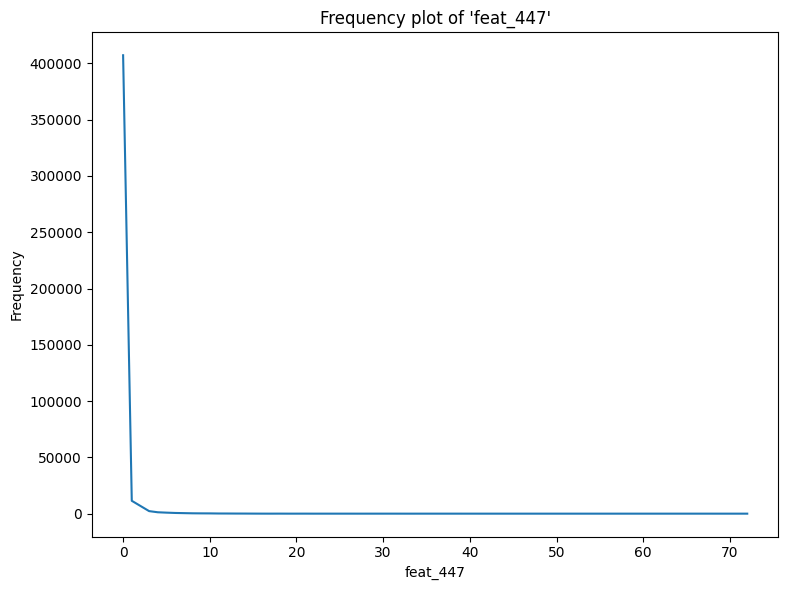

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_447':
Value	 Count%
feat_447
0.0    83.602256
1.0     2.347227
3.0     0.464149
4.0     0.254143
5.0     0.184962
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_447':
Value	 Count%
feat_447
55.0    0.000411
48.0    0.000205
71.0    0.000205
33.0    0.000205
45.0    0.000205
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


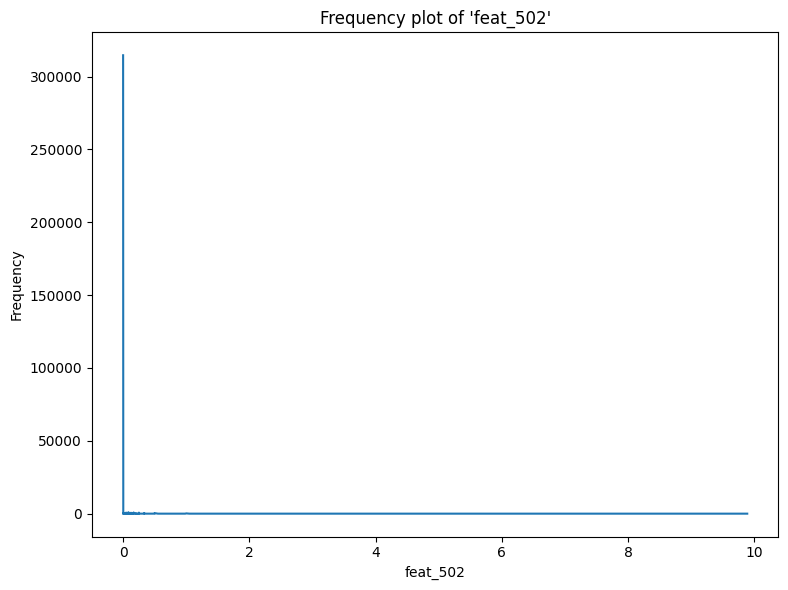

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_502':
Value	 Count%
feat_502
0.000000    63.992475
0.083333     0.201739
0.166667     0.164726
0.250000     0.147237
0.125000     0.126900
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_502':
Value	 Count%
feat_502
0.092659    0.000203
0.094853    0.000203
0.800000    0.000203
0.107437    0.000203
0.017533    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


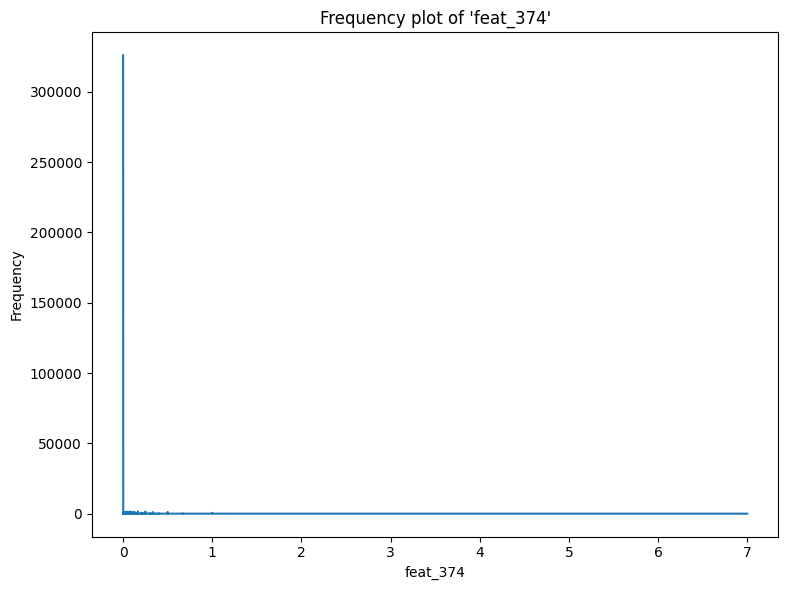

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_374':
Value	 Count%
feat_374
0.000000    66.306676
0.083333     0.338025
0.166667     0.326229
0.250000     0.304670
0.041667     0.290230
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_374':
Value	 Count%
feat_374
0.057309    0.000203
0.135556    0.000203
0.020171    0.000203
0.153509    0.000203
0.016749    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


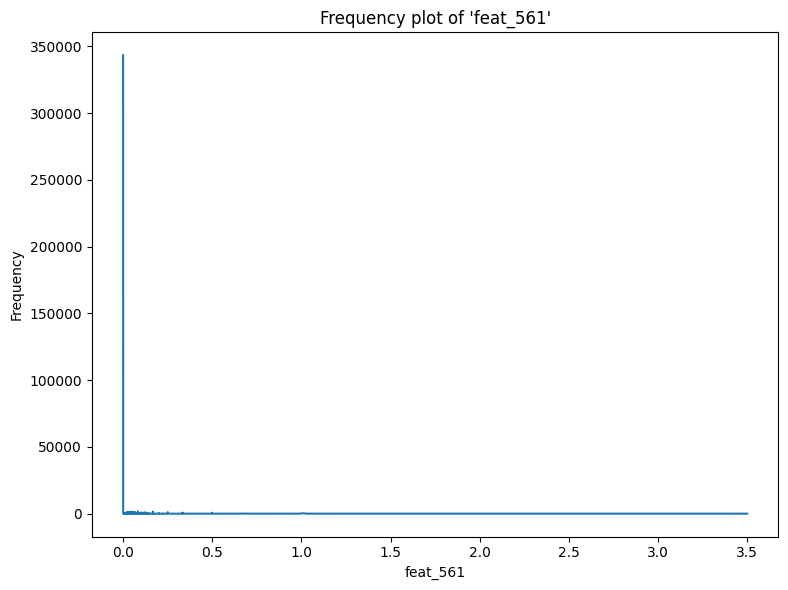

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_561':
Value	 Count%
feat_561
0.000000    69.839627
0.083333     0.347347
0.041667     0.308504
0.166667     0.307487
0.055556     0.268848
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_561':
Value	 Count%
feat_561
0.018398    0.000203
0.057205    0.000203
0.227381    0.000203
0.045671    0.000203
0.312903    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


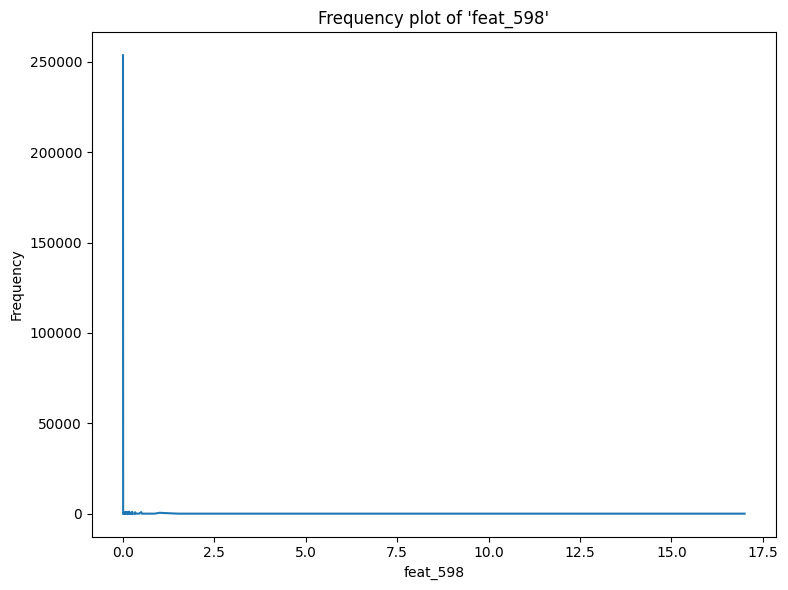

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_598':
Value	 Count%
feat_598
0.000000    51.584537
0.166667     0.233466
0.250000     0.212722
0.083333     0.204181
0.500000     0.180590
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_598':
Value	 Count%
feat_598
0.005208    0.000203
0.024444    0.000203
0.129227    0.000203
0.098485    0.000203
0.103611    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


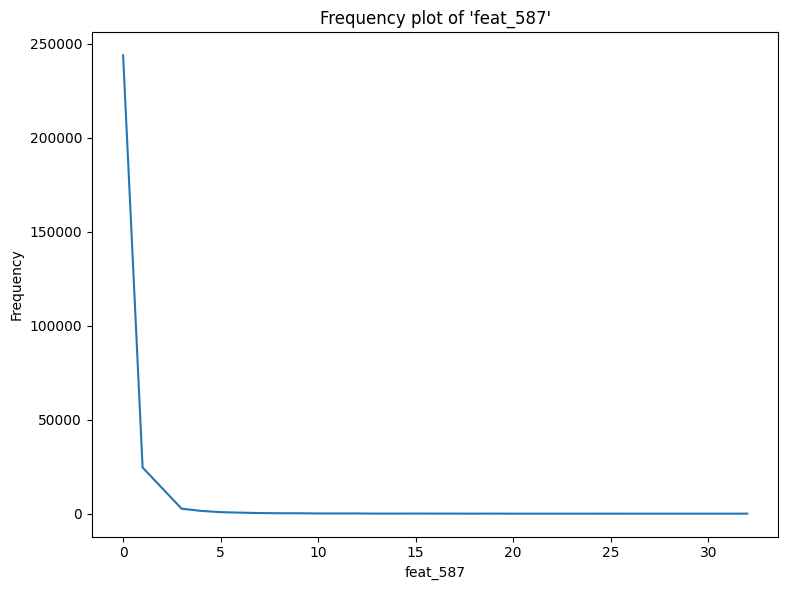

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_587':
Value	 Count%
feat_587
0.0    50.276862
1.0     5.056073
3.0     0.545065
4.0     0.303043
5.0     0.166570
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_587':
Value	 Count%
feat_587
21.0    0.000825
20.0    0.000825
23.0    0.000825
29.0    0.000618
27.0    0.000412
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


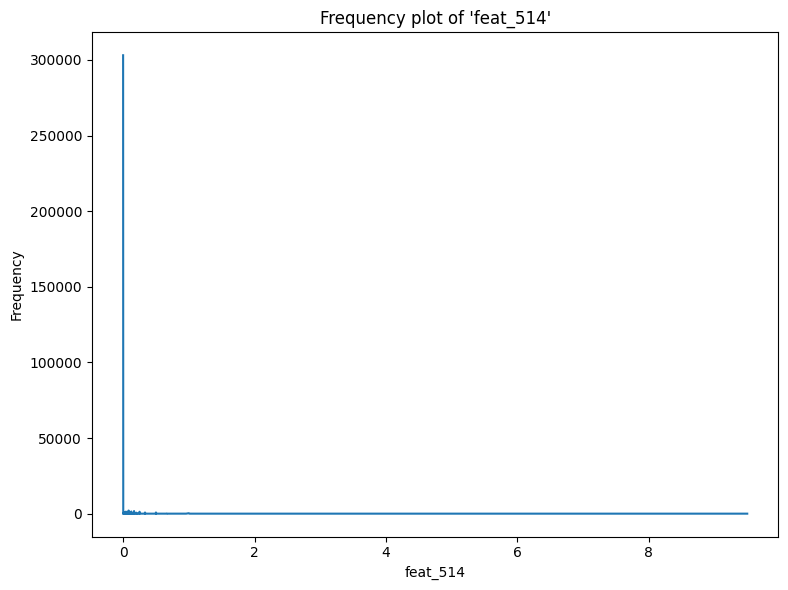

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_514':
Value	 Count%
feat_514
0.000000    61.638428
0.083333     0.420172
0.166667     0.351025
0.125000     0.290623
0.041667     0.270082
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_514':
Value	 Count%
feat_514
0.165380    0.000203
0.001667    0.000203
0.032576    0.000203
0.038647    0.000203
0.484375    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


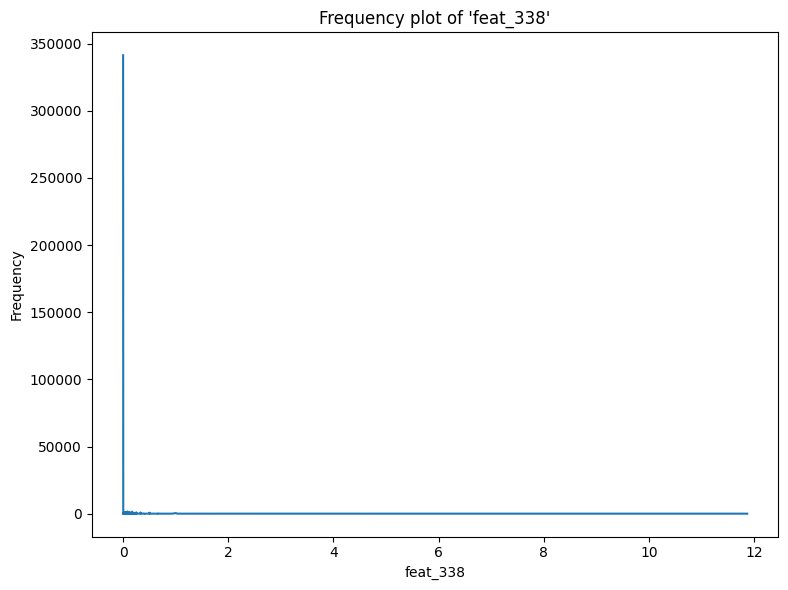

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_338':
Value	 Count%
feat_338
0.000000    69.434733
0.083333     0.329687
0.166667     0.298772
0.055556     0.244875
0.033333     0.231452
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_338':
Value	 Count%
feat_338
0.041950    0.000203
0.008424    0.000203
0.021096    0.000203
0.278061    0.000203
0.034503    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


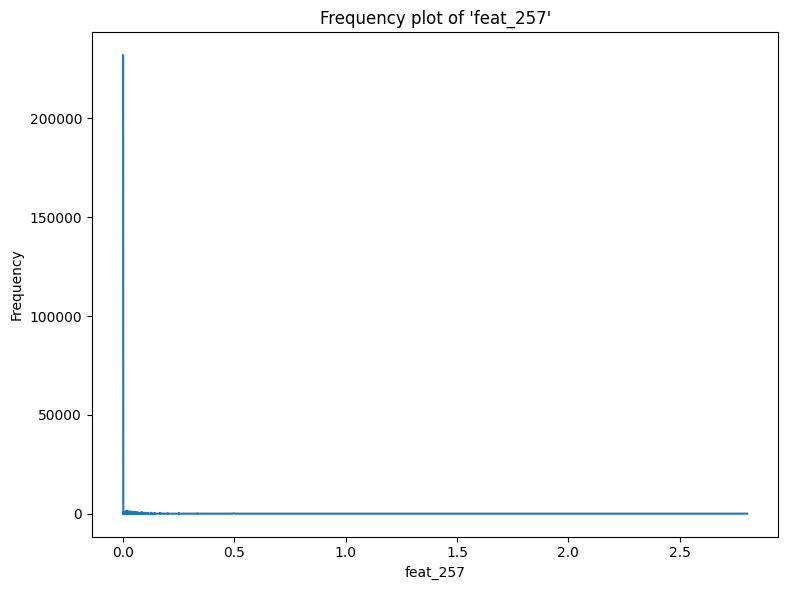

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_257':
Value	 Count%
feat_257
0.000000    47.176833
0.016667     0.261930
0.020833     0.234273
0.013889     0.230612
0.033333     0.228578
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_257':
Value	 Count%
feat_257
0.026360    0.000203
0.005127    0.000203
0.026969    0.000203
0.011758    0.000203
0.357143    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


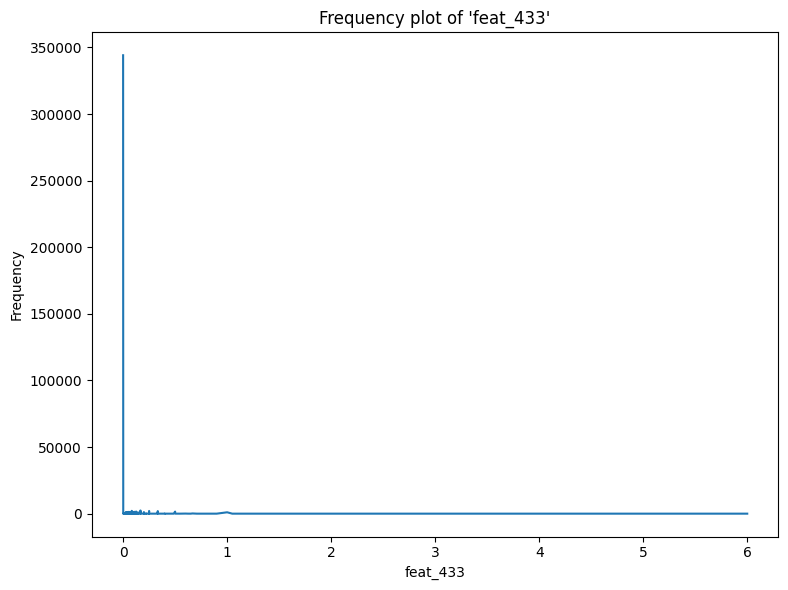

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_433':
Value	 Count%
feat_433
0.000000    69.996990
0.166667     0.485891
0.083333     0.430366
0.250000     0.412062
0.333333     0.388062
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_433':
Value	 Count%
feat_433
0.121693    0.000203
0.209381    0.000203
0.042593    0.000203
0.257778    0.000203
0.169168    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


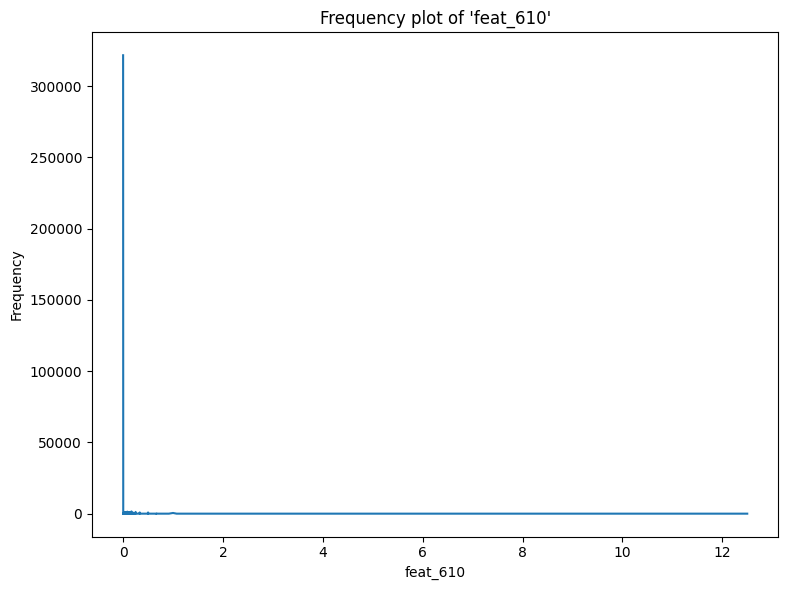

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_610':
Value	 Count%
feat_610
0.000000    65.418078
0.166667     0.321129
0.083333     0.286962
0.250000     0.247304
0.125000     0.233068
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_610':
Value	 Count%
feat_610
0.089394    0.000203
0.007711    0.000203
0.119617    0.000203
0.089205    0.000203
0.128741    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


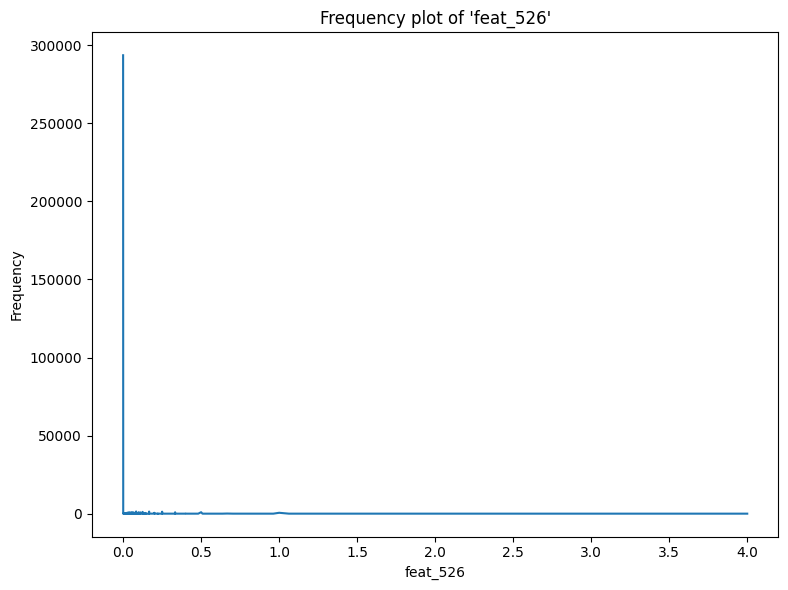

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_526':
Value	 Count%
feat_526
0.000000    59.712050
0.083333     0.283109
0.166667     0.273347
0.250000     0.256873
0.125000     0.232467
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_526':
Value	 Count%
feat_526
0.404762    0.000203
0.016234    0.000203
0.114706    0.000203
0.354167    0.000203
0.030864    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


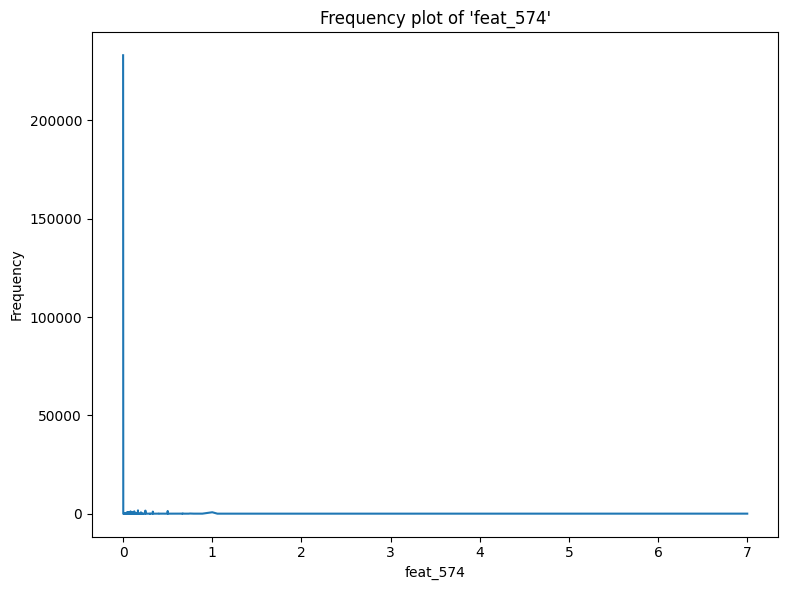

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_574':
Value	 Count%
feat_574
0.000000    47.420238
0.166667     0.341257
0.250000     0.315429
0.500000     0.275771
0.125000     0.239978
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_574':
Value	 Count%
feat_574
0.028075    0.000203
0.230000    0.000203
0.131590    0.000203
0.148571    0.000203
0.168246    0.000203
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


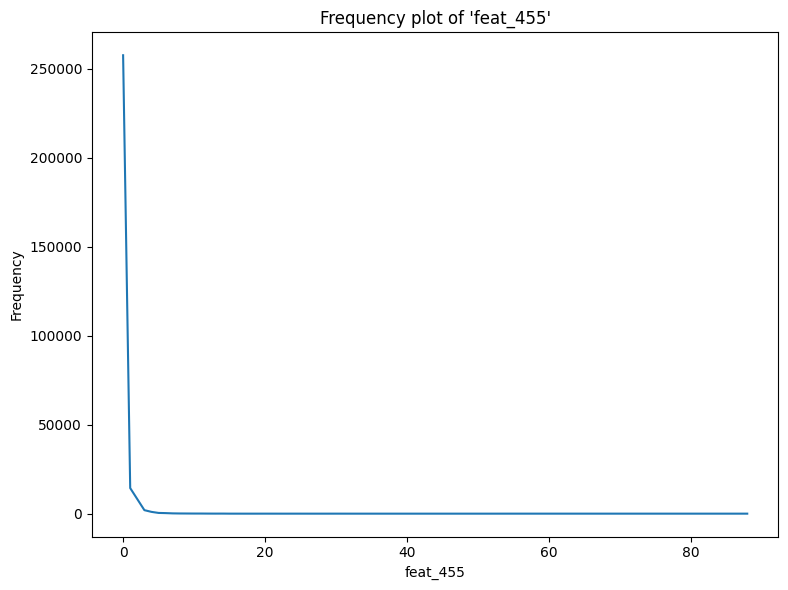

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_455':
Value	 Count%
feat_455
0.0    52.971809
1.0     2.955966
3.0     0.405116
4.0     0.206776
5.0     0.084562
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_455':
Value	 Count%
feat_455
32.0    0.000411
27.0    0.000206
52.0    0.000206
23.0    0.000206
36.0    0.000206
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


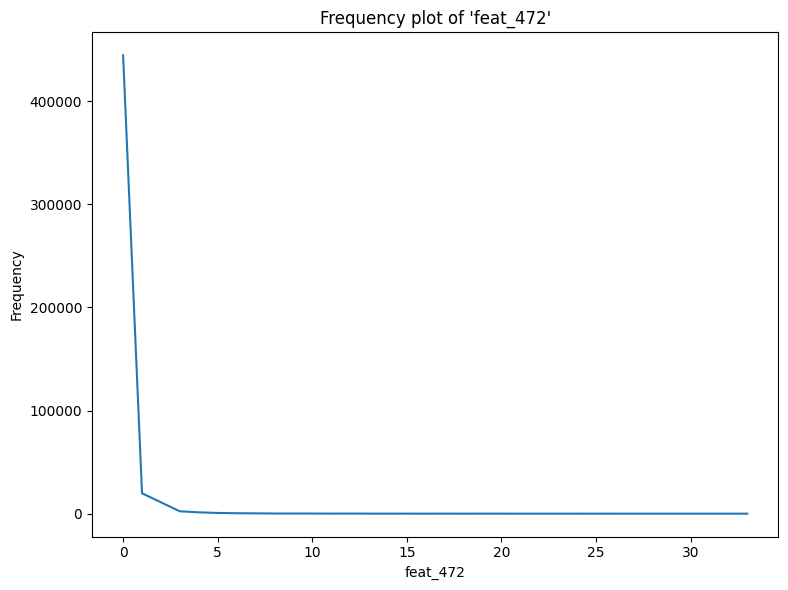

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_472':
Value	 Count%
feat_472
0.0    91.445557
1.0     4.063314
3.0     0.472469
4.0     0.264838
5.0     0.141782
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_472':
Value	 Count%
feat_472
30.0    0.000617
26.0    0.000412
31.0    0.000412
33.0    0.000412
23.0    0.000206
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


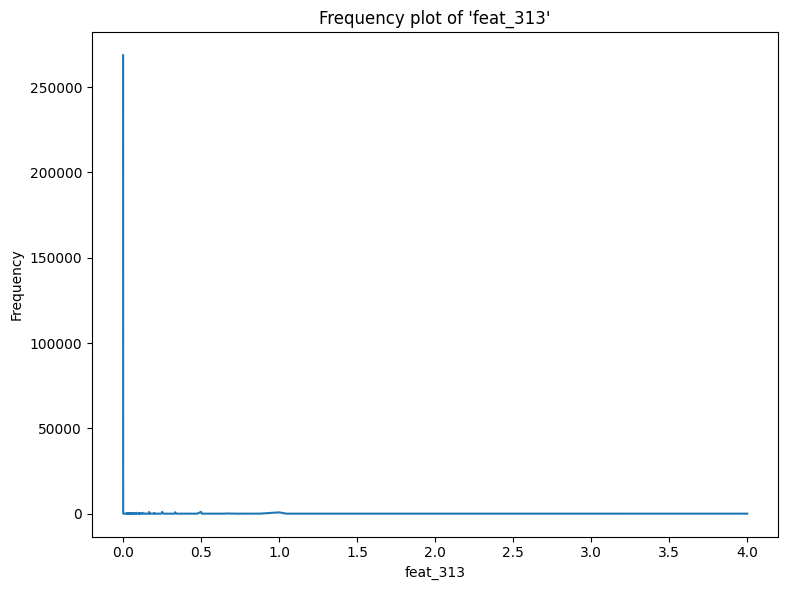

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_313':
Value	 Count%
feat_313
0.000000    54.650413
0.250000     0.208457
0.500000     0.207440
0.166667     0.200728
0.333333     0.164121
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_313':
Value	 Count%
feat_313
0.312312    0.000203
0.008658    0.000203
0.008403    0.000203
0.209524    0.000203
0.117949    0.000203
Name: count, dtype: float64


In [63]:
for col in df5.columns:
    valuecounts_plot(col,df[df[col]!=2])

Based on the histogram and distribution of the data, we can see that although the data has low variance, the data is still very concentrated at 0 value.

It is difficult to determine whether this data is missing value or if it has some meaning because the value points are quite close together.

Such skewed data can have a negative impact on the model
- You can use log transform on a column with the most evenly distributed data to evaluate the model. If the model is not good, you can:
- consider removing these columns.

## EDA for HIGH VARIANCE COLUMNS

In [64]:
df4.columns

Index(['feat_149', 'feat_623', 'feat_535', 'feat_87', 'feat_135', 'feat_102',
       'feat_527', 'feat_91', 'feat_158', 'feat_604',
       ...
       'feat_508', 'feat_456', 'feat_491', 'feat_120', 'feat_284', 'feat_496',
       'feat_76', 'feat_0', 'feat_443', 'feat_383'],
      dtype='object', length=127)

In [65]:
df4['feat_136'].value_counts()

feat_136
0.0       431367
344.0       2197
289.0        342
193.0        337
85.0         310
           ...  
5080.0        26
43.0          24
5011.0        20
124.0         20
21.0           2
Name: count, Length: 83, dtype: int64

- The data has a large variance, but the data is still concentrated in columns with value 0, so it is likely that those columns are missing values.
- If the amount of missing values is large, you should consider removing these columns because it is very difficult to replace these values

In [66]:
def remove_high_zero_value(df):
    zero_percentage = df.apply(lambda x: (x == 0).sum() / len(x) * 100)
    col_to_drop = zero_percentage[zero_percentage > 80].keys()
    df_remove = df.drop(col_to_drop, axis=1)
    print(f'Removed {df.shape[1]- df_remove.shape[1]} features, {df_remove.shape[1]} features left.')
    return df_remove

In [67]:
df4=remove_high_zero_value(df4)

Removed 48 features, 79 features left.


In [68]:
df4.columns

Index(['feat_623', 'feat_87', 'feat_102', 'feat_527', 'feat_91', 'feat_281',
       'feat_279', 'feat_79', 'feat_77', 'feat_104', 'feat_529', 'feat_444',
       'feat_389', 'feat_75', 'feat_422', 'feat_304', 'feat_101', 'feat_315',
       'feat_89', 'feat_564', 'feat_80', 'feat_100', 'feat_555', 'feat_575',
       'feat_467', 'feat_563', 'feat_403', 'feat_251', 'feat_291', 'feat_540',
       'feat_88', 'feat_250', 'feat_292', 'feat_316', 'feat_565', 'feat_103',
       'feat_78', 'feat_599', 'feat_589', 'feat_556', 'feat_588', 'feat_613',
       'feat_531', 'feat_303', 'feat_367', 'feat_317', 'feat_479', 'feat_469',
       'feat_515', 'feat_480', 'feat_445', 'feat_528', 'feat_368', 'feat_328',
       'feat_92', 'feat_457', 'feat_272', 'feat_249', 'feat_516', 'feat_341',
       'feat_468', 'feat_612', 'feat_503', 'feat_402', 'feat_576', 'feat_99',
       'feat_280', 'feat_388', 'feat_242', 'feat_492', 'feat_271', 'feat_327',
       'feat_539', 'feat_456', 'feat_491', 'feat_284', 'feat_76

#### FEATURE feat_367 - EXAMPLE

In [69]:
df['feat_367'].value_counts()

feat_367
0.0     368553
1.0      33976
2.0      12280
3.0       5867
4.0       3240
5.0       1929
6.0       1327
7.0        819
8.0        545
9.0        465
10.0       300
11.0       210
12.0       172
13.0       136
14.0       124
15.0        83
17.0        76
18.0        68
16.0        59
23.0        17
19.0        17
20.0        17
26.0        17
28.0        11
27.0         9
21.0         8
36.0         8
30.0         7
22.0         6
35.0         6
25.0         5
63.0         5
52.0         4
57.0         3
29.0         3
34.0         2
45.0         1
68.0         1
33.0         1
Name: count, dtype: int64

In [70]:
df['feat_367'].value_counts().tail()

feat_367
29.0    3
34.0    2
45.0    1
68.0    1
33.0    1
Name: count, dtype: int64

In [71]:
df['feat_367'].isnull().sum()

61360

In [72]:
len(np.array(sorted(df.feat_136.unique())))

84

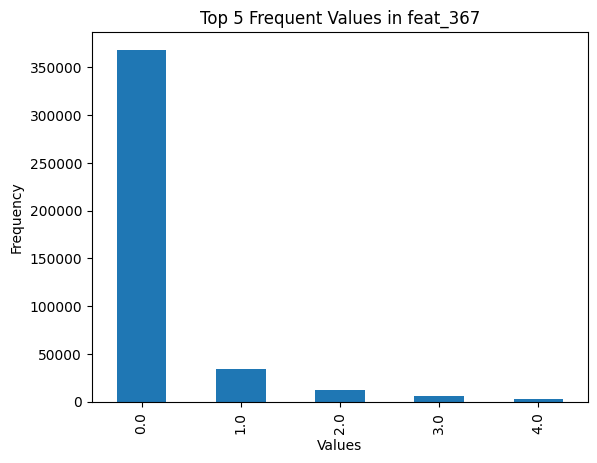

In [73]:
import matplotlib.pyplot as plt

value_counts=df['feat_367'].value_counts()
top_5 = value_counts.head(5)

top_5.plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Top 5 Frequent Values in feat_367')
plt.show()



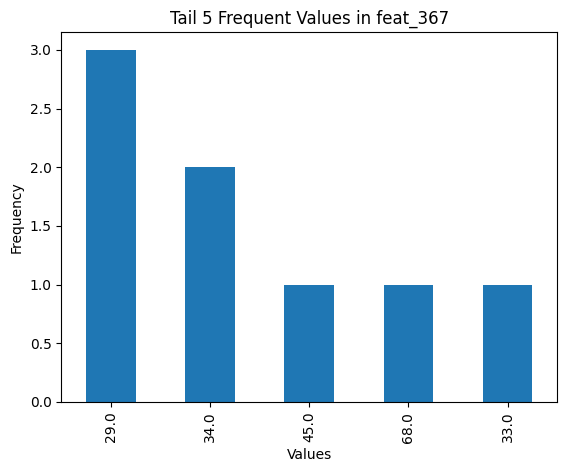

In [74]:

value_counts=df['feat_367'].value_counts()
top_5 = value_counts.tail(5)

top_5.plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Tail 5 Frequent Values in feat_367')
plt.show()

0 maybe a missing value

In [75]:
missing = dict(df['feat_367'].value_counts())[0]*100/df.shape[0]

print("The percentage values that have extreme values for feat_136 in train and test data are %.3f%% respectively"%(missing))


The percentage values that have extreme values for feat_136 in train and test data are 74.949% respectively


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


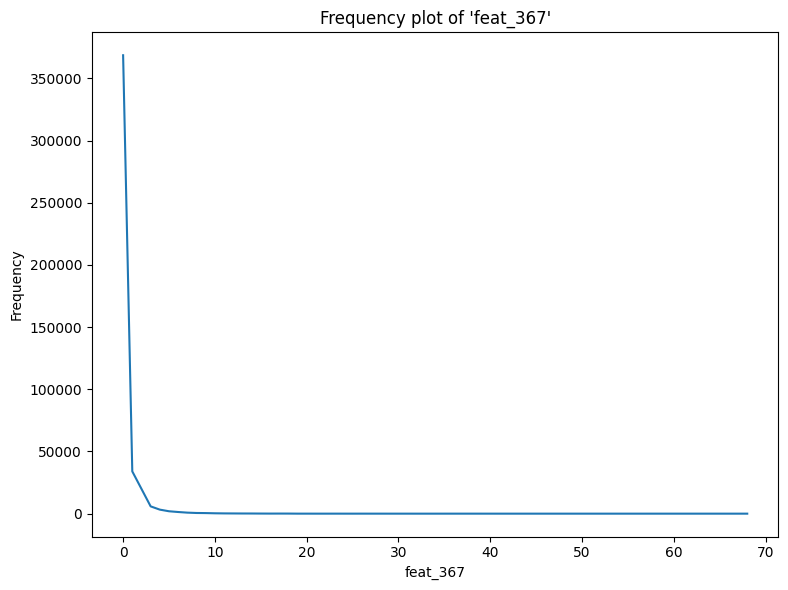

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_367':
Value	 Count%
feat_367
0.0    76.868833
1.0     7.086350
3.0     1.223676
4.0     0.675764
5.0     0.402330
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_367':
Value	 Count%
feat_367
29.0    0.000626
34.0    0.000417
45.0    0.000209
68.0    0.000209
33.0    0.000209
Name: count, dtype: float64


In [76]:
valuecounts_plot('feat_367',df[df['feat_367']!=2])

In [77]:
y_train[y_train==0].shape[0]

481817

The no. of customers that are unsatisfied are 9920.
The no. of customers that are satisfied are 481817.



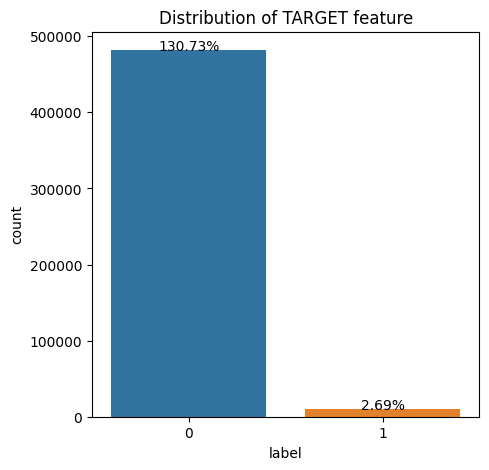

In [78]:
mask = df[df['feat_367']==0]
countplot_target(mask,y_train,h=1)

In [79]:
df['TARGET']=y_train

/tmp/ipykernel_42/3320570128.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['TARGET']=y_train


In [80]:
replace=df.copy()

In [81]:
replace['feat_367'].replace(0,1.0,inplace=True)

In [82]:
replace['feat_367'].value_counts()

feat_367
1.0     402529
2.0      12280
3.0       5867
4.0       3240
5.0       1929
6.0       1327
7.0        819
8.0        545
9.0        465
10.0       300
11.0       210
12.0       172
13.0       136
14.0       124
15.0        83
17.0        76
18.0        68
16.0        59
19.0        17
26.0        17
23.0        17
20.0        17
28.0        11
27.0         9
21.0         8
36.0         8
30.0         7
35.0         6
22.0         6
63.0         5
25.0         5
52.0         4
57.0         3
29.0         3
34.0         2
45.0         1
68.0         1
33.0         1
Name: count, dtype: int64

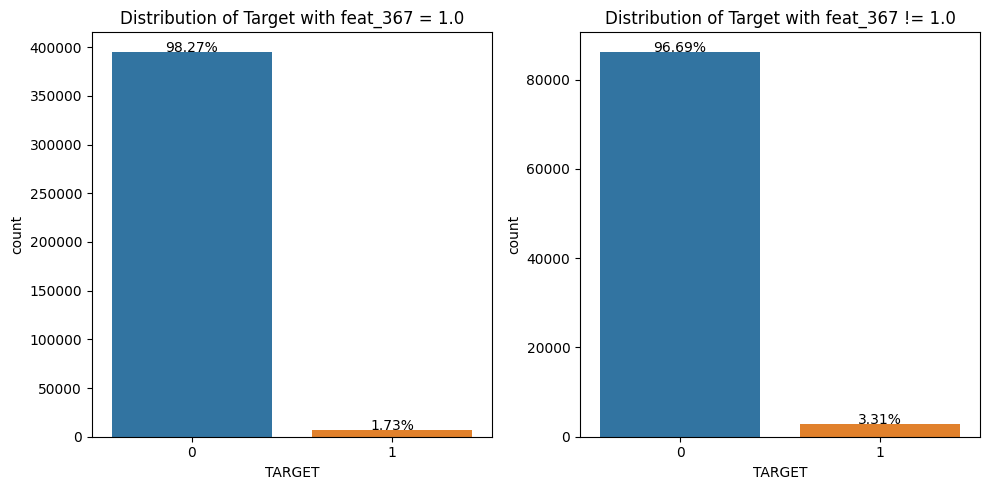

----------------------------------------------------------------------------------------------------
The no. of customers that are unsatisfied are 6966 for feat_367 = 1.0.
The no. of customers that are satisfied are 395563 for feat_367 = 1.0.

The no. of customers that are unsatisfied are 2954 for feat_367 != 1.0.
The no. of customers that are satisfied are 86254 for feat_367 != 1.0.


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your DataFrame df is assumed to be predefined

# Finding the distribution of TARGET when feat_0 is a specific value
mask = replace[replace['feat_367'] == 1.0]
total = mask.shape[0]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax = sns.countplot(x=mask['TARGET'], ax=ax1)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,  # Adjust 3 or as needed for your data
            '{:1.2f}%'.format(height * 100 / total),
            ha="center")
ax1.set_title("Distribution of Target with feat_367 = 1.0")

# Count of targets
target_1 = mask[mask['TARGET'] == 1].shape[0]
target_0 = mask[mask['TARGET'] == 0].shape[0]

# Finding the distribution of Target when feat_0 is not the specific value
mask = replace[replace['feat_367'] != 1.0]
total = mask.shape[0]

ax = sns.countplot(x=mask['TARGET'], ax=ax2)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,  # Adjust 3 or as needed for your data
            '{:1.2f}%'.format(height * 100 / total),
            ha="center")
ax2.set_title("Distribution of Target with feat_367 != 1.0")

plt.tight_layout()
plt.show()

# Print statements
print('-' * 100)
print(f"The no. of customers that are unsatisfied are {target_1} for feat_367 = 1.0.")
print(f"The no. of customers that are satisfied are {target_0} for feat_367 = 1.0.")
print('')
target_1_ = mask[mask['TARGET'] == 1].shape[0]
target_0_ = mask[mask['TARGET'] == 0].shape[0]
print(f"The no. of customers that are unsatisfied are {target_1_} for feat_367 != 1.0.")
print(f"The no. of customers that are satisfied are {target_0_} for feat_367 != 1.0.")


It seems that replacing missing value with mode is not a wise choice
- You can try a few other ways

In [84]:
mean=df[df['feat_367'] != 0]['feat_367'].mean()

In [85]:
replace=df.copy()
replace['feat_367'].replace(0,mean,inplace=True)

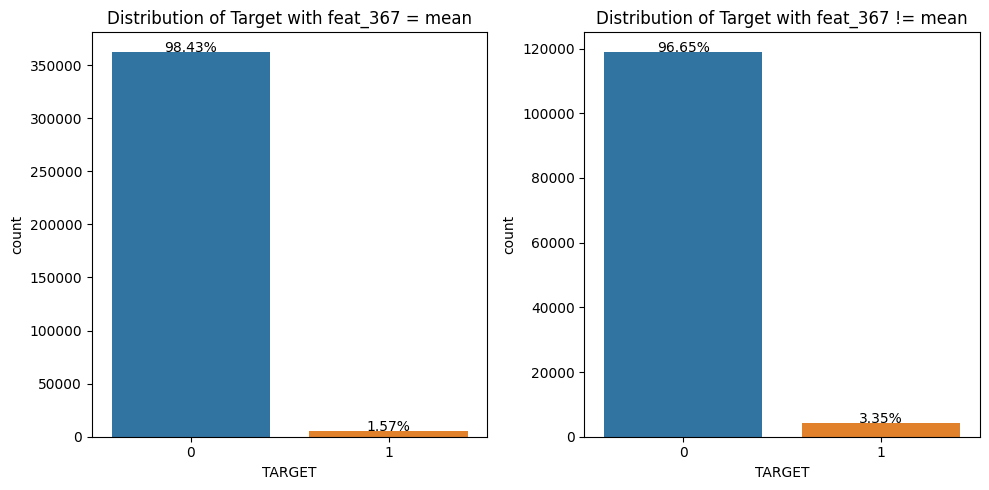

----------------------------------------------------------------------------------------------------
The no. of customers that are unsatisfied are 5794 for feat_367 = mean.
The no. of customers that are satisfied are 362759 for feat_367 = mean.

The no. of customers that are unsatisfied are 4126 for feat_367 !=mean.
The no. of customers that are satisfied are 119058 for feat_367 != mean.


In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your DataFrame df is assumed to be predefined

# Finding the distribution of TARGET when feat_0 is a specific value
mask = replace[replace['feat_367'] == mean]
total = mask.shape[0]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax = sns.countplot(x=mask['TARGET'], ax=ax1)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,  # Adjust 3 or as needed for your data
            '{:1.2f}%'.format(height * 100 / total),
            ha="center")
ax1.set_title("Distribution of Target with feat_367 = mean")

# Count of targets
target_1 = mask[mask['TARGET'] == 1].shape[0]
target_0 = mask[mask['TARGET'] == 0].shape[0]

# Finding the distribution of Target when feat_0 is not the specific value
mask = replace[replace['feat_367'] != mean]
total = mask.shape[0]

ax = sns.countplot(x=mask['TARGET'], ax=ax2)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,  # Adjust 3 or as needed for your data
            '{:1.2f}%'.format(height * 100 / total),
            ha="center")
ax2.set_title("Distribution of Target with feat_367 != mean")

plt.tight_layout()
plt.show()

# Print statements
print('-' * 100)
print(f"The no. of customers that are unsatisfied are {target_1} for feat_367 = mean.")
print(f"The no. of customers that are satisfied are {target_0} for feat_367 = mean.")
print('')
target_1_ = mask[mask['TARGET'] == 1].shape[0]
target_0_ = mask[mask['TARGET'] == 0].shape[0]
print(f"The no. of customers that are unsatisfied are {target_1_} for feat_367 !=mean.")
print(f"The no. of customers that are satisfied are {target_0_} for feat_367 != mean.")


There is still another way to process this data: replace 0 with nan and use KNNImputer

### Data < 30 values

In [87]:
df2.columns

Index(['feat_9', 'feat_10', 'feat_11', 'feat_39', 'feat_40', 'feat_41',
       'feat_48', 'feat_49', 'feat_50', 'feat_57', 'feat_58', 'feat_59',
       'feat_69', 'feat_70', 'feat_71', 'feat_90', 'feat_270', 'feat_282',
       'feat_294', 'feat_306', 'feat_307', 'feat_318', 'feat_319', 'feat_320',
       'feat_330', 'feat_331', 'feat_339', 'feat_342', 'feat_343', 'feat_351',
       'feat_352', 'feat_353', 'feat_356', 'feat_366', 'feat_375', 'feat_376',
       'feat_378', 'feat_379', 'feat_387', 'feat_390', 'feat_391', 'feat_410',
       'feat_411', 'feat_412', 'feat_413', 'feat_414', 'feat_415', 'feat_425',
       'feat_426', 'feat_446', 'feat_458', 'feat_459', 'feat_460', 'feat_470',
       'feat_471', 'feat_482', 'feat_494', 'feat_495', 'feat_506', 'feat_518',
       'feat_519', 'feat_530', 'feat_533', 'feat_534', 'feat_542', 'feat_554',
       'feat_559', 'feat_566', 'feat_567', 'feat_578', 'feat_579', 'feat_590',
       'feat_591', 'feat_592', 'feat_602', 'feat_603', 'feat_614', 'f

In [88]:
df['feat_9'].value_counts()

feat_9
0.0        437936
21980.0       187
20327.0       182
18741.0       173
20229.0       172
18560.0       166
19751.0       165
18449.0       164
19510.0       151
Name: count, dtype: int64

Similarly, you need to delete columns with large 0s

In [89]:
df2=remove_high_zero_value(df2)

Removed 47 features, 36 features left.


In [90]:
df2.columns

Index(['feat_90', 'feat_270', 'feat_282', 'feat_294', 'feat_306', 'feat_318',
       'feat_330', 'feat_339', 'feat_342', 'feat_351', 'feat_366', 'feat_375',
       'feat_378', 'feat_387', 'feat_390', 'feat_410', 'feat_413', 'feat_425',
       'feat_446', 'feat_458', 'feat_470', 'feat_482', 'feat_494', 'feat_506',
       'feat_518', 'feat_530', 'feat_533', 'feat_542', 'feat_554', 'feat_566',
       'feat_578', 'feat_590', 'feat_602', 'feat_614', 'feat_622', 'feat_625'],
      dtype='object')

In [91]:
df['feat_578'].value_counts()

feat_578
0.0     279091
1.0       2059
2.0        426
3.0        145
4.0         57
5.0         32
8.0         27
7.0         19
6.0         16
14.0        11
11.0         8
12.0         4
18.0         2
25.0         1
33.0         1
10.0         1
Name: count, dtype: int64

In [92]:
variances = df2.var()


variance_threshold = variances.mean()  # Ví dụ, sử dụng giá trị trung bình của tất cả các phương sai

high_variance_columns = variances[variances > variance_threshold].index

print("Các cột có phương sai lớn:")
print(high_variance_columns)

Các cột có phương sai lớn:
Index(['feat_90', 'feat_270', 'feat_282', 'feat_339', 'feat_366', 'feat_387',
       'feat_530', 'feat_542', 'feat_554'],
      dtype='object')


In [93]:
len(high_variance_columns)

9

In [94]:
for i in high_variance_columns:
    print('***************a******************')
    print(df[pd.notnull(df[i])][i].sort_values())

*********************************
0          0.0
305617     0.0
305616     0.0
305610     0.0
305609     0.0
          ... 
130685    24.0
878       24.0
345596    24.0
72473     24.0
266678    24.0
Name: feat_90, Length: 439296, dtype: float64
*********************************
0          0.0
266145     0.0
266146     0.0
266147     0.0
266148     0.0
          ... 
135696    29.0
117667    29.0
230023    29.0
173372    32.0
346564    32.0
Name: feat_270, Length: 281900, dtype: float64
*********************************
0          0.0
266493     0.0
266494     0.0
266495     0.0
266496     0.0
          ... 
111393    29.0
311032    29.0
173372    47.0
346564    47.0
391104    53.0
Name: feat_282, Length: 281900, dtype: float64
*********************************
0          0.0
266988     0.0
266989     0.0
266990     0.0
266991     0.0
          ... 
450827    29.0
340500    29.0
321600    38.0
129081    38.0
425620    38.0
Name: feat_339, Length: 281900, dtype: float64
*****************

Chúng ta cần lưu ý 1 vài cột :feat_366 và feat_530

## feat_366 và feat_530

/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


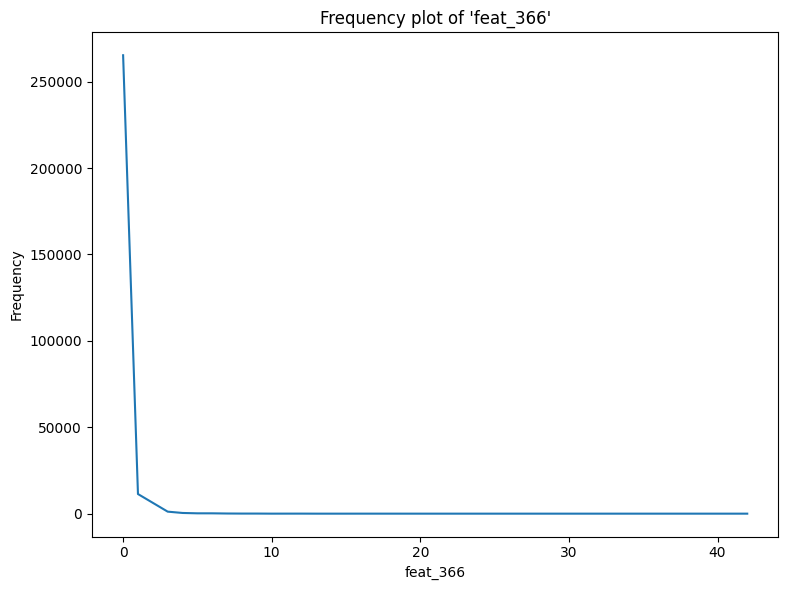

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_366':
Value	 Count%
feat_366
0.0    54.281061
1.0     2.324820
3.0     0.238968
4.0     0.082861
5.0     0.040715
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_366':
Value	 Count%
feat_366
14.0    0.001023
25.0    0.001023
15.0    0.001023
20.0    0.000818
42.0    0.000614
Name: count, dtype: float64


In [95]:
valuecounts_plot('feat_366',df[df['feat_366']!=2])

/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


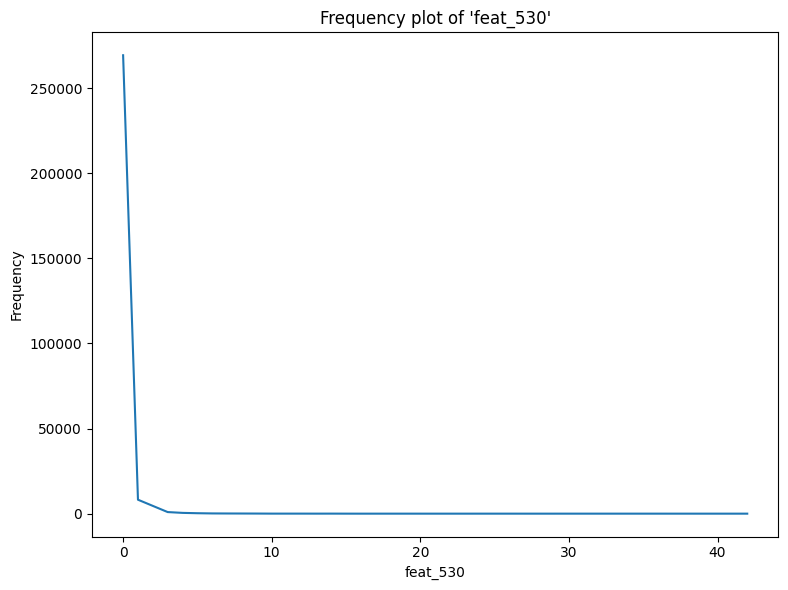

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_530':
Value	 Count%
feat_530
0.0    55.012213
1.0     1.674482
3.0     0.190955
4.0     0.094150
5.0     0.053100
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_530':
Value	 Count%
feat_530
20.0    0.001021
27.0    0.000817
23.0    0.000613
42.0    0.000613
16.0    0.000408
Name: count, dtype: float64


In [96]:
valuecounts_plot('feat_530',df[df['feat_530']!=2])

Phân bố dữ liểu giữa 2 cọt cũng khá tương đồng

In [97]:
col1 = df['feat_366']
col2 = df['feat_530']


print('Euclidean:',np.sqrt(np.sum((col1 - col2) ** 2)))
print('Correaltion:',col1.corr(col2))


Euclidean: 291.27135114871834
Correaltion: 0.5882541524504592


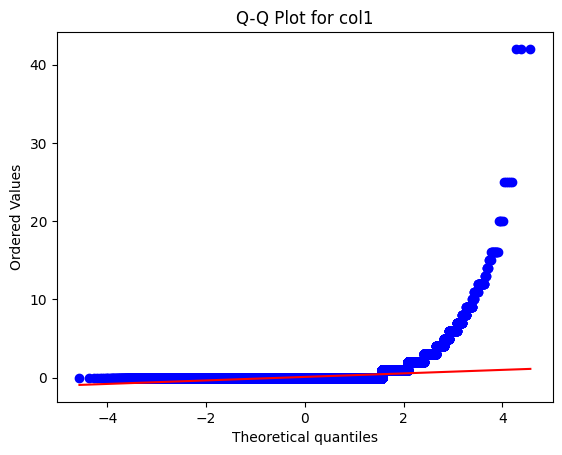

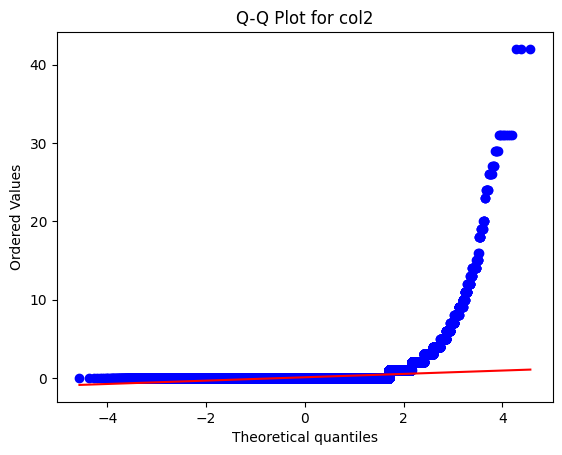

In [98]:
import numpy as np
import scipy.stats as stats

data1 = df['feat_366'].dropna()
data2 = df['feat_530'].dropna()

stats.probplot(data1, dist="norm", plot=plt)
plt.title("Q-Q Plot for col1")
plt.show()

stats.probplot(data2, dist="norm", plot=plt)
plt.title("Q-Q Plot for col2")
plt.show()


The two charts are quite similar in terms of distribution as well as correlation with each other
- You can consider using 1 of 2 columns
- 0 value in cases with large variance is difficult to consider, there will be 2 cases: missing value or NaN
- Maybe when evaluating the model, you can try testing with these two types

In [99]:
df['feat_90']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
491732    0.0
491733    0.0
491734    0.0
491735    0.0
491736    0.0
Name: feat_90, Length: 491737, dtype: float64

/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


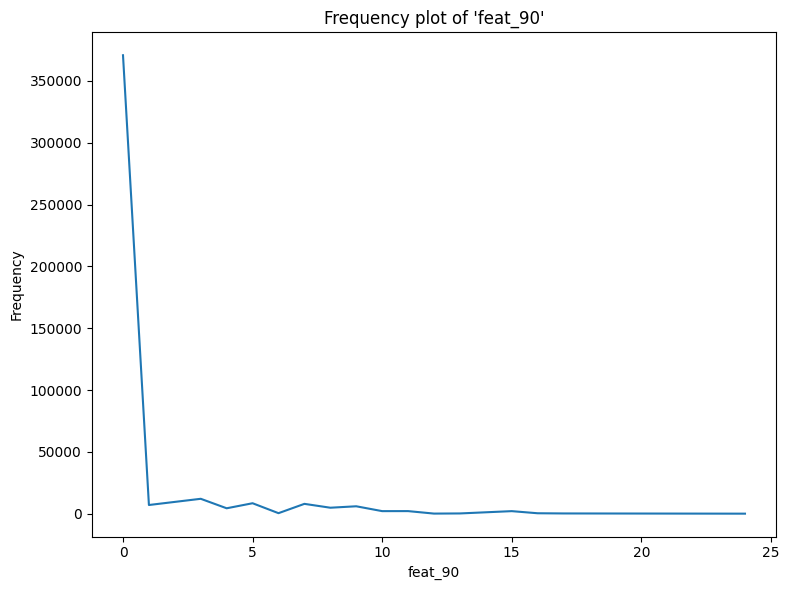

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_90':
Value	 Count%
feat_90
0.0    76.997996
3.0     2.503713
5.0     1.757625
7.0     1.653356
1.0     1.461018
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_90':
Value	 Count%
feat_90
16.0    0.074152
13.0    0.043411
17.0    0.042996
12.0    0.018694
24.0    0.006854
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


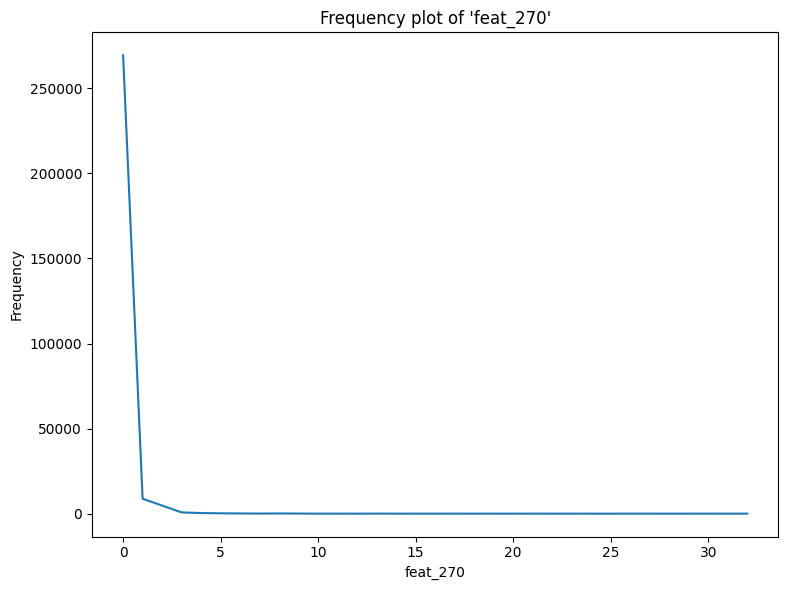

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_270':
Value	 Count%
feat_270
0.0    55.005481
1.0     1.790537
3.0     0.150657
4.0     0.074512
5.0     0.042053
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_270':
Value	 Count%
feat_270
10.0    0.001021
16.0    0.000817
15.0    0.000612
32.0    0.000408
25.0    0.000204
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


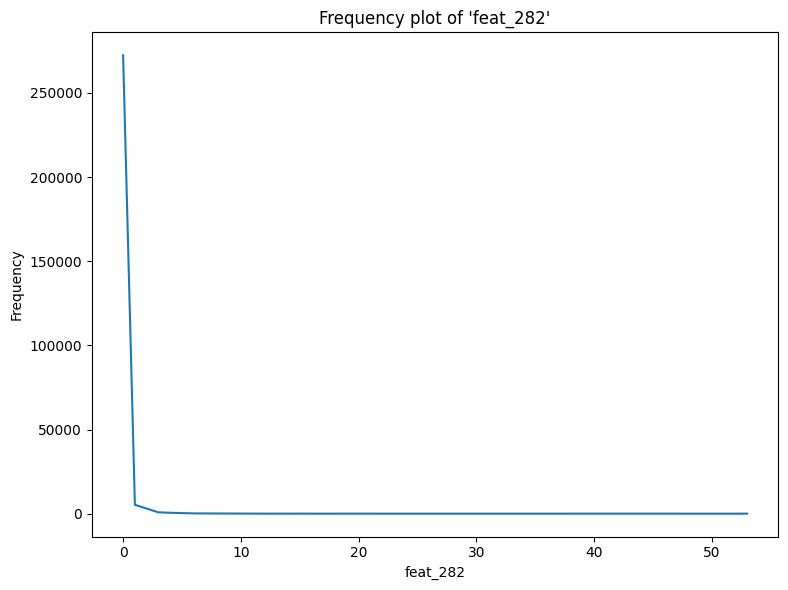

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_282':
Value	 Count%
feat_282
0.0    55.608204
1.0     1.071583
3.0     0.162095
4.0     0.109833
5.0     0.071248
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_282':
Value	 Count%
feat_282
24.0    0.001429
29.0    0.001021
22.0    0.000612
47.0    0.000408
53.0    0.000204
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


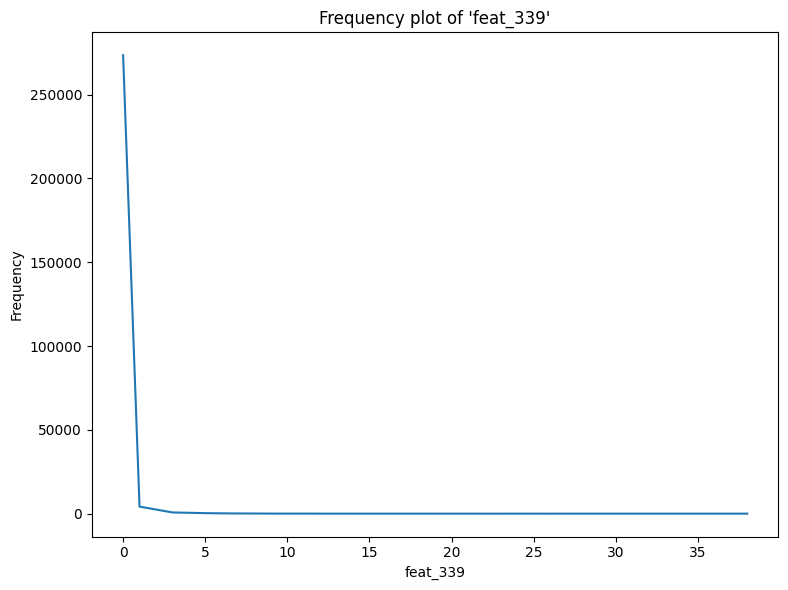

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_339':
Value	 Count%
feat_339
0.0    55.847010
1.0     0.858160
3.0     0.150107
4.0     0.107015
5.0     0.060860
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_339':
Value	 Count%
feat_339
38.0    0.000613
23.0    0.000408
19.0    0.000408
26.0    0.000204
22.0    0.000204
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


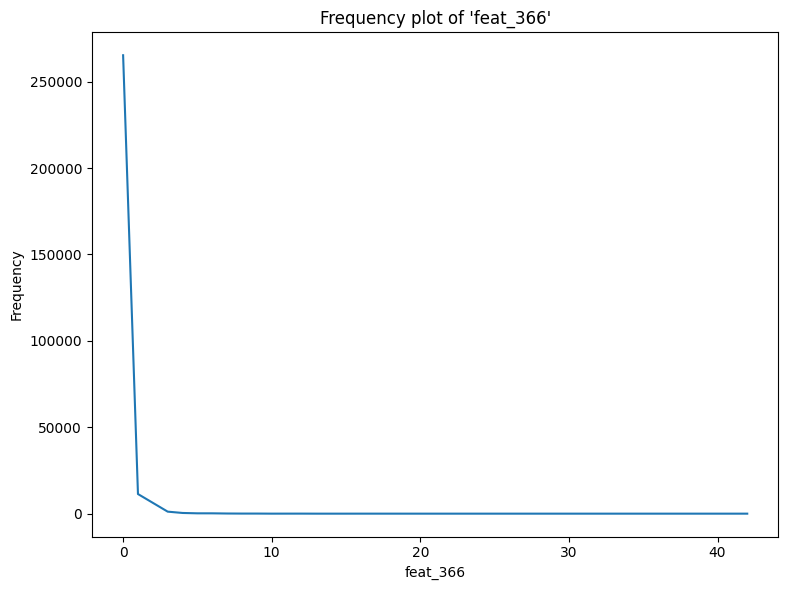

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_366':
Value	 Count%
feat_366
0.0    54.281061
1.0     2.324820
3.0     0.238968
4.0     0.082861
5.0     0.040715
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_366':
Value	 Count%
feat_366
14.0    0.001023
25.0    0.001023
15.0    0.001023
20.0    0.000818
42.0    0.000614
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


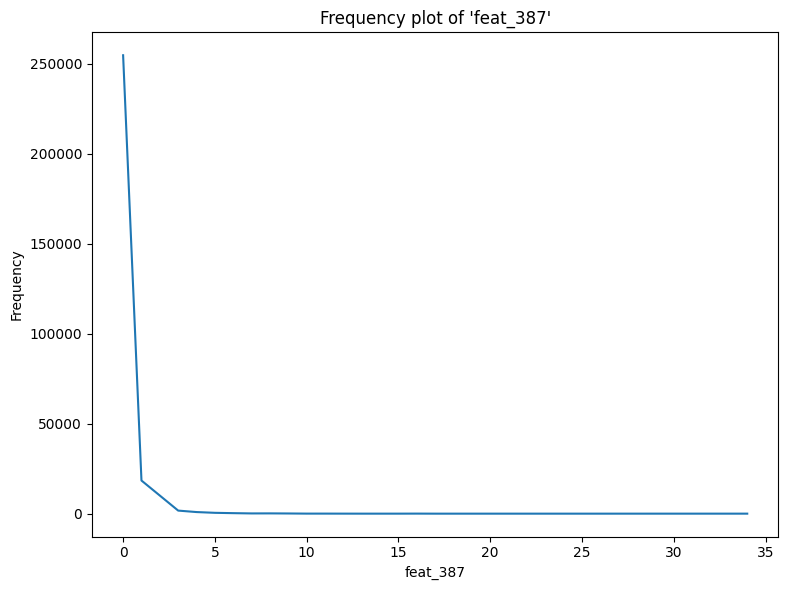

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_387':
Value	 Count%
feat_387
0.0    52.318339
1.0     3.782348
3.0     0.349620
4.0     0.182821
5.0     0.095930
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_387':
Value	 Count%
feat_387
14.0    0.001027
20.0    0.000822
17.0    0.000616
19.0    0.000205
23.0    0.000205
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


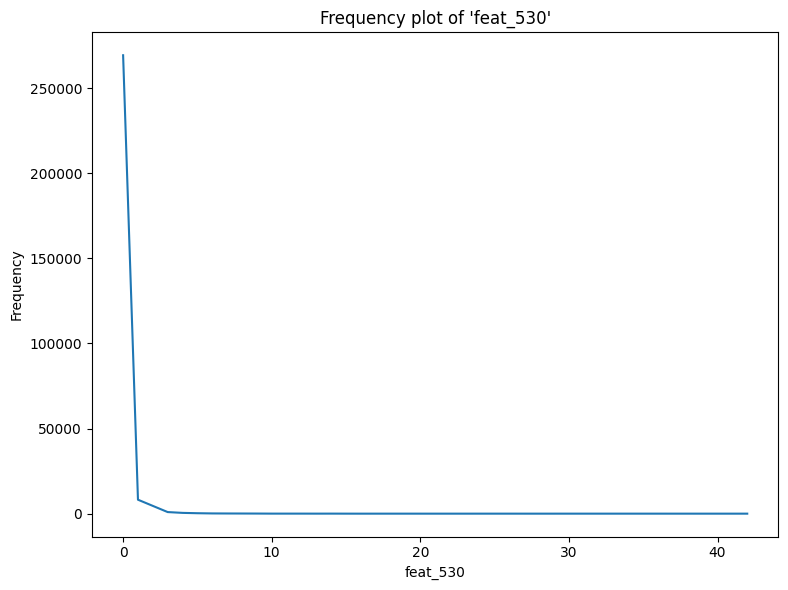

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_530':
Value	 Count%
feat_530
0.0    55.012213
1.0     1.674482
3.0     0.190955
4.0     0.094150
5.0     0.053100
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_530':
Value	 Count%
feat_530
20.0    0.001021
27.0    0.000817
23.0    0.000613
42.0    0.000613
16.0    0.000408
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


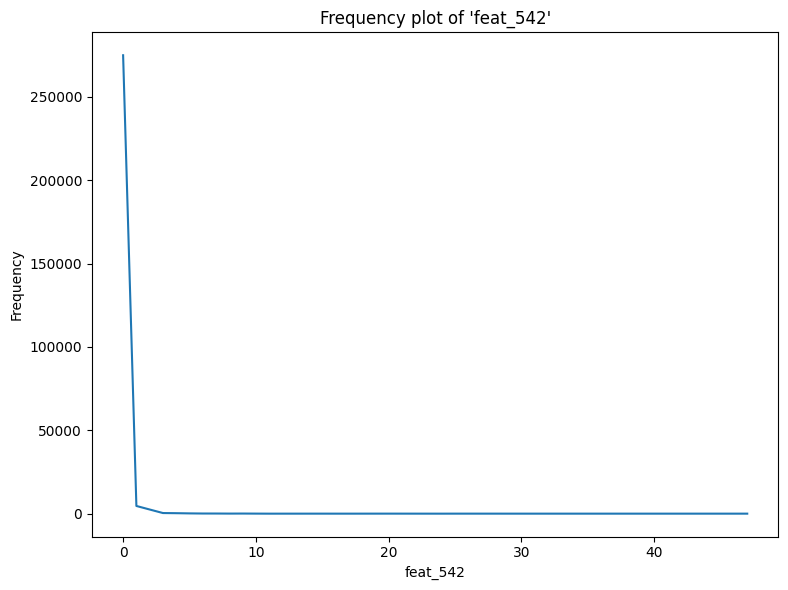

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_542':
Value	 Count%
feat_542
0.0    56.045300
1.0     0.941537
3.0     0.074997
4.0     0.058082
5.0     0.033015
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_542':
Value	 Count%
feat_542
17.0    0.001019
12.0    0.001019
32.0    0.000815
11.0    0.000204
24.0    0.000204
Name: count, dtype: float64


/tmp/ipykernel_42/1998774958.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


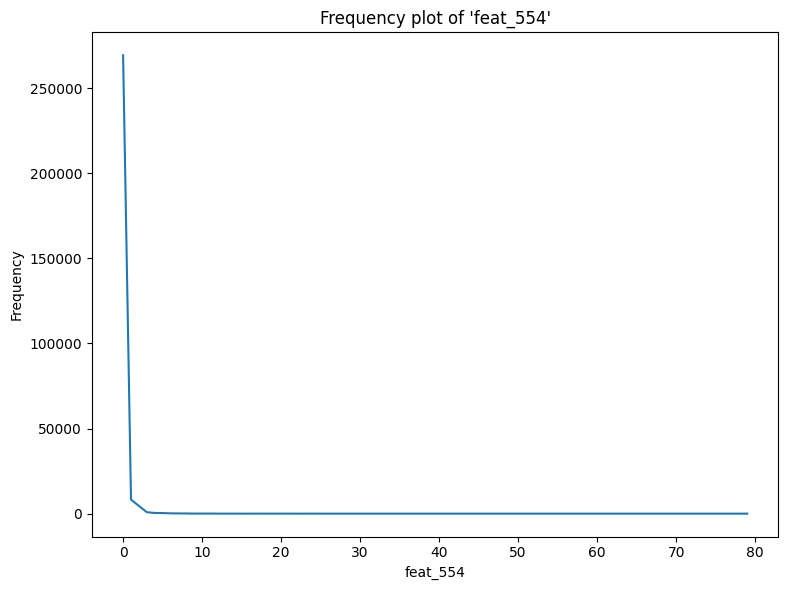

****************************************************************************************************
Percentage value counts(top 5 only) in train data for 'feat_554':
Value	 Count%
feat_554
0.0    54.992457
1.0     1.681811
3.0     0.173734
4.0     0.085744
5.0     0.073495
Name: count, dtype: float64
****************************************************************************************************
Percentage value counts(bottom 5 only) in train data for 'feat_554':
Value	 Count%
feat_554
38.0    0.001021
31.0    0.000817
22.0    0.000612
15.0    0.000612
19.0    0.000204
Name: count, dtype: float64


In [100]:
for i in high_variance_columns:
    valuecounts_plot(i,df[df[i]!=2])

There are some columns that have a more stable distribution than the rest, such as **feat_90**, **feat_387**